### **PARTE 1: Análisis Exploratorio de Datos (EDA)** - 15 puntos

#### Objetivos
Comprender en profundidad el dataset y el problema de desbalance.

#### Tareas Requeridas

**1.1. Exploración Básica**
- Cargar el dataset y mostrar información general (shape, tipos de datos, valores faltantes)
- Calcular estadísticas descriptivas de variables numéricas
- Identificar y cuantificar el desbalance de clases
- Visualizar la distribución de la variable objetivo

**1.2. Análisis de Variables**
- Analizar distribución de variables numéricas (histogramas, boxplots)
- Analizar variables categóricas (frecuencias, top valores)
- Identificar outliers en variables numéricas
- Analizar correlaciones entre variables numéricas

**1.3. Análisis del Fraude**
- Comparar características de transacciones fraudulentas vs normales
- Identificar variables con mayor diferencia entre clases
- Analizar patrones temporales (hora del día, día de semana)
- Analizar distribución geográfica del fraude

**Entregable**: Notebook con visualizaciones y conclusiones del EDA.

---

### Exploración Básica

Carga de datos

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fraud_df = pd.read_csv('../data/raw/fraud_dataset_v2.csv')


Resumen descriptivo

In [ ]:
# Tamaño del dataset
print("Tamaño del dataset:", fraud_df.shape)

# Tipos de datos
print("\nTipos de datos por columna:")
print(fraud_df.dtypes)

# Valores faltantes por columna
print("\nValores faltantes por columna:")
faltantes = fraud_df.isnull().sum()
porcentaje_faltantes = (fraud_df.isnull().sum() / fraud_df.shape[0]) * 100
faltantes_df = pd.DataFrame({
    'Valores Faltantes': faltantes,
    'Porcentaje (%)': porcentaje_faltantes.round(2)
})
print(faltantes_df)

| Variable      | Tipo de Dato | Valores Faltantes | Porcentaje Faltantes (%) |
|---------------|:------------:|:-----------------:|:-----------------------:|
| Unnamed: 0    |    int64     |         0         |          0.00           |
| a             |    int64     |         0         |          0.00           |
| b             |   float64    |      21474        |          8.59           |
| c             |   float64    |      21474        |          8.59           |
| d             |   float64    |       594         |          0.24           |
| e             |   float64    |         0         |          0.00           |
| f             |   float64    |        15         |          0.01           |
| g             |    object    |       324         |          0.13           |
| h             |    int64     |         0         |          0.00           |
| i             |    object    |         0         |          0.00           |
| j             |    object    |         0         |          0.00           |
| k             |   float64    |         0         |          0.00           |
| l             |   float64    |        15         |          0.01           |
| m             |   float64    |       594         |          0.24           |
| n             |    int64     |         0         |          0.00           |
| o             |    object    |     183628        |         73.45           |
| p             |    object    |         0         |          0.00           |
| q             |   float64    |       594         |          0.24           |
| r             |    int64     |         0         |          0.00           |
| s             |    int64     |         0         |          0.00           |
| fecha         |    object    |         0         |          0.00           |
| monto         |   float64    |         0         |          0.00           |
| score         |   float64    |         0         |          0.00           |
| fraude        |    int64     |         0         |          0.00           |

**Tamaño del dataset:** (250000, 24)

In [6]:
# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:")
numericas = fraud_df.select_dtypes(include=['int64', 'float64'])
desc_stats = numericas.describe().T
display(desc_stats)



Estadísticas descriptivas de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,250000.0,64999.500000,40104.111592,0.000000,31249.75000,62499.500000,93749.250000,1.499990e+05
a,250000.0,3.710736,0.908846,0.000000,3.00000,4.000000,4.000000,5.000000e+00
b,228526.0,0.727647,0.132455,0.000000,0.67780,0.755200,0.806100,1.000000e+00
c,228526.0,257801.060924,840623.502209,0.160000,9714.78500,43578.310000,144911.600000,1.387874e+07
d,249406.0,21.828208,20.088081,-1.000000,3.00000,15.000000,49.000000,5.100000e+01
e,250000.0,0.222844,2.650651,0.000000,0.00000,0.106154,0.283668,8.333333e+02
f,249985.0,51.288385,681.830910,-5.000000,1.00000,9.000000,33.000000,1.452740e+05
h,250000.0,14.259116,14.196752,-1.000000,3.00000,9.000000,21.000000,5.900000e+01
k,250000.0,0.497599,0.288246,0.000004,0.24691,0.495780,0.746415,9.999948e-01
l,249985.0,2325.054195,1711.840924,-1.000000,931.00000,1960.000000,3469.000000,7.544000e+03


Desbalance de clases

/tmp/ipykernel_13436/133503693.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='fraude', data=fraud_df, palette='pastel')


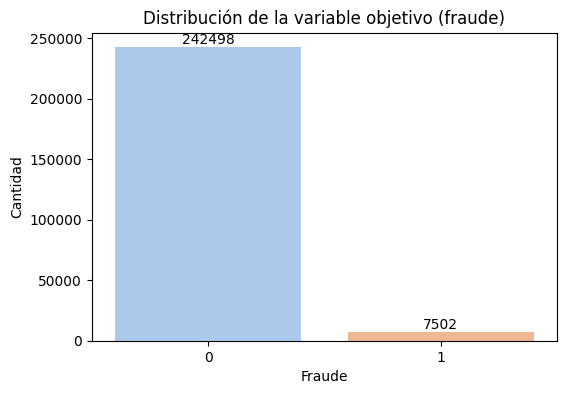

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar bar chart con los valores que toma la columna 'fraude'
plt.figure(figsize=(6,4))
ax = sns.countplot(x='fraude', data=fraud_df, palette='pastel')
plt.title('Distribución de la variable objetivo (fraude)')
plt.xlabel('Fraude')
plt.ylabel('Cantidad')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Calcular el porcentaje de transacciones fraudulentas
porcentaje_fraude = fraud_df['fraude'].mean() * 100
print(f"El fraude representa el {porcentaje_fraude:.2f}% del dataset")

El fraude representa el 3.00% del dataset


Análisis de Variables

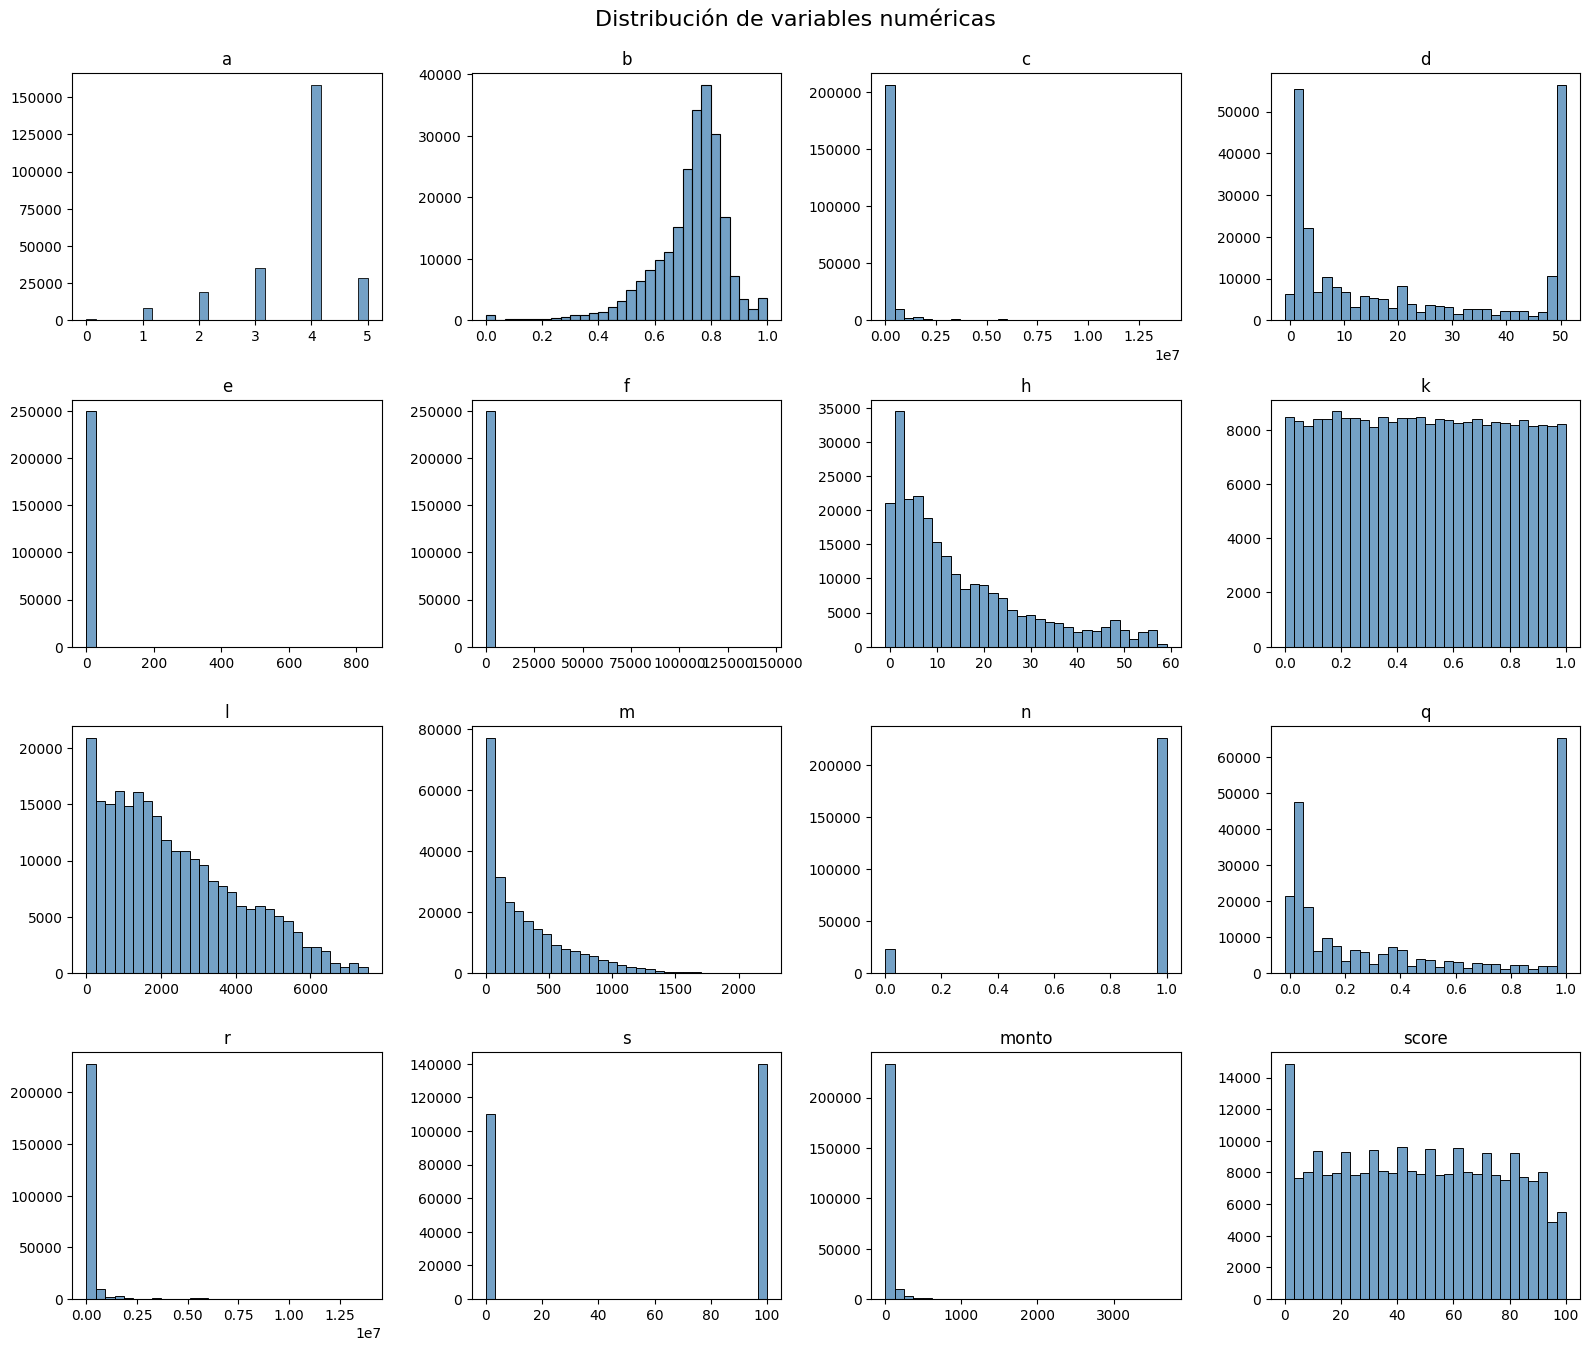

In [16]:
# Histograma de todas las variables numéricas en un grid

numericas_cols = [col for col in fraud_df.select_dtypes(include=['int64', 'float64']).columns if col != 'fraude']

n_cols = 4
n_rows = -(-len(numericas_cols) // n_cols)  # techo de la división para cubrir todas las columnas

plt.figure(figsize=(4 * n_cols, 3.3 * n_rows))
for idx, col in enumerate(numericas_cols):
    plt.subplot(n_rows, n_cols, idx+1)
    sns.histplot(fraud_df[col].dropna(), bins=30, color='steelblue', kde=False)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()

plt.suptitle('Distribución de variables numéricas', y=1.02, fontsize=16)
plt.show()

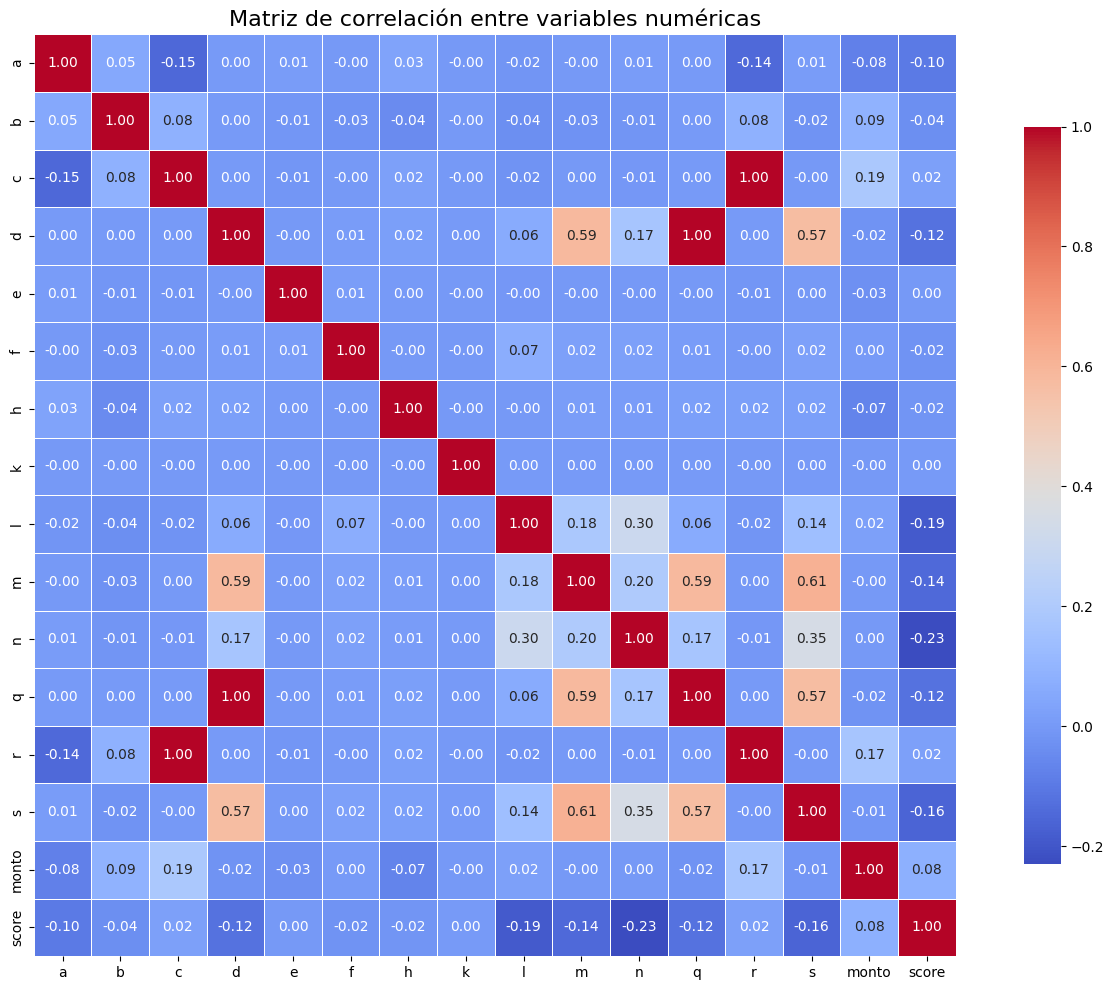

In [17]:
# Matriz de correlación entre variables numéricas

# Calcular la matriz de correlación de las variables numéricas
corr_matrix = fraud_df[numericas_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8}
)
plt.title('Matriz de correlación entre variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()

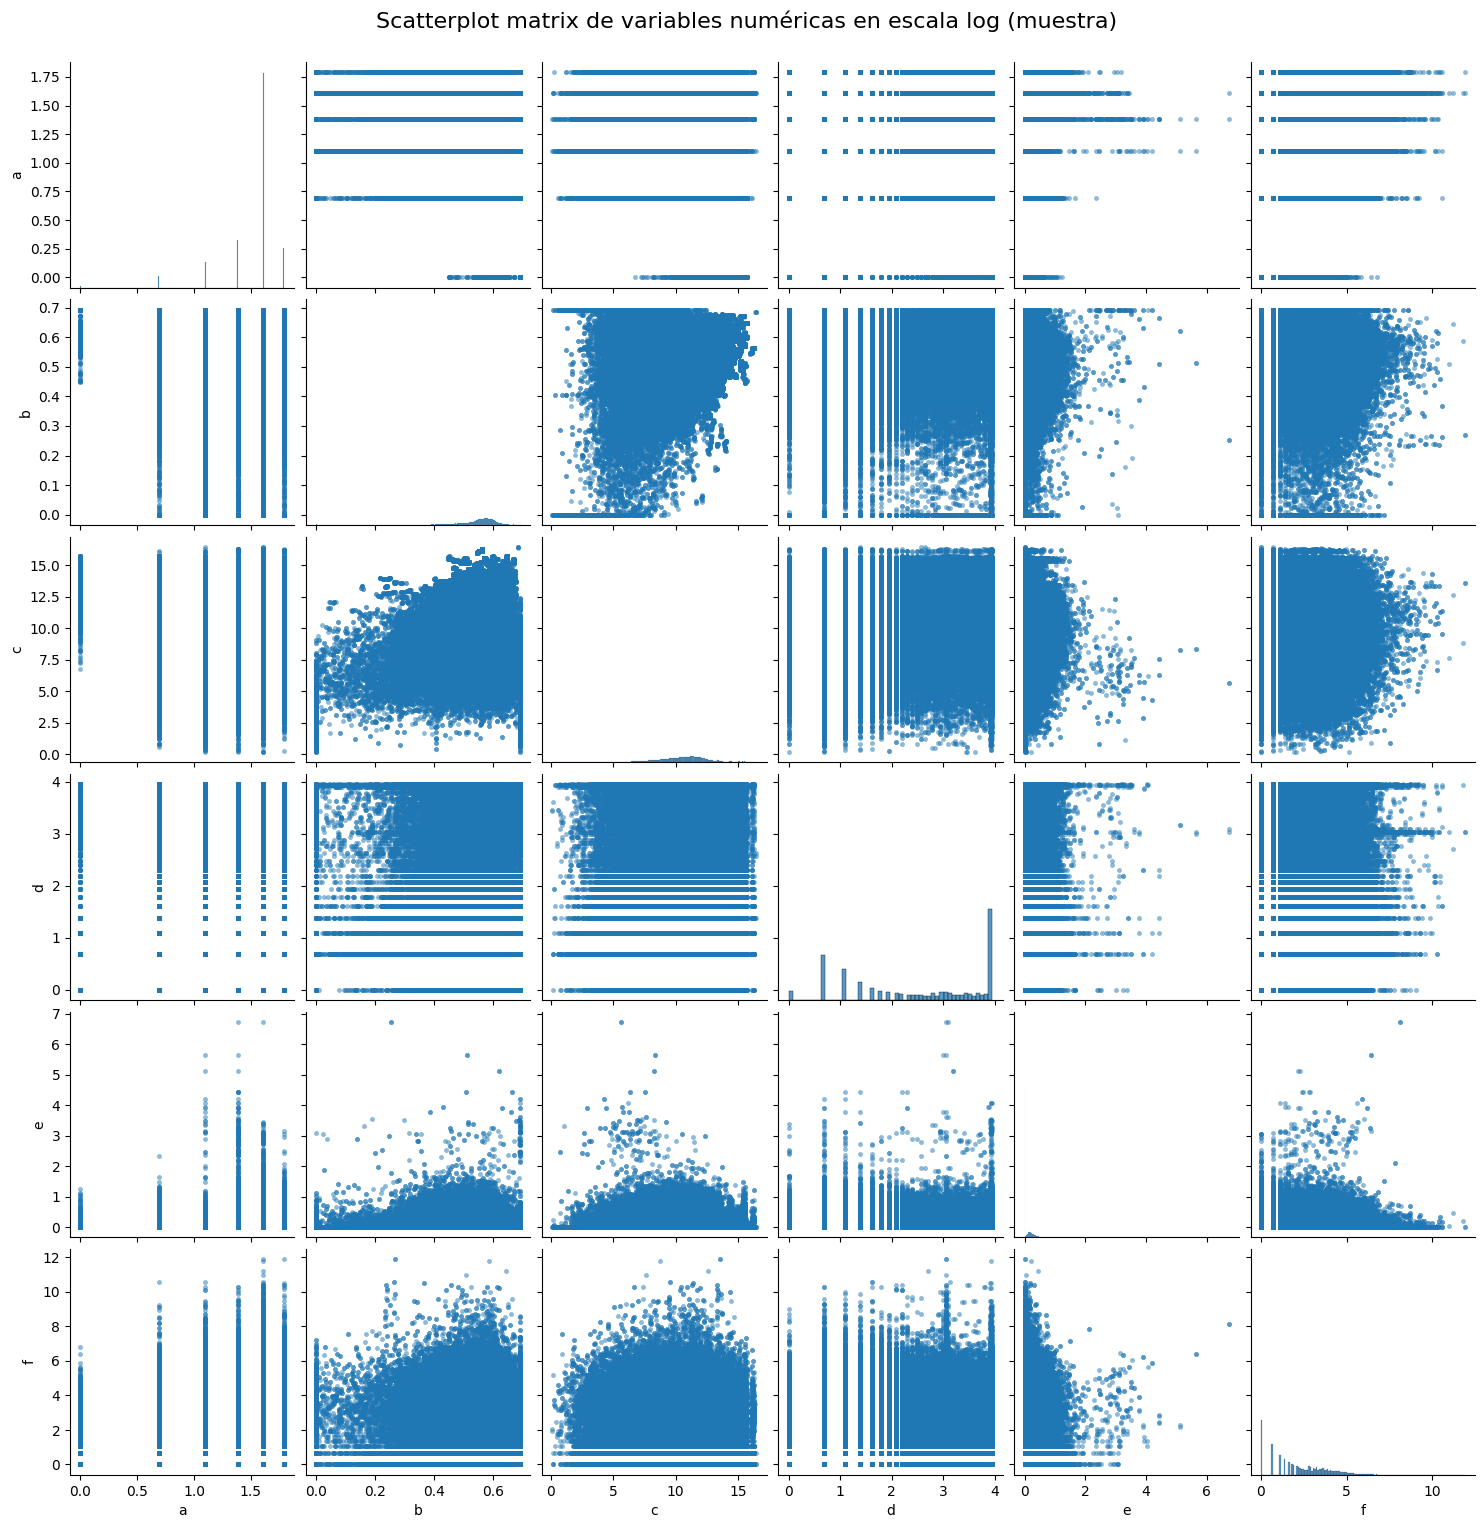

In [19]:
# Grid de scatterplots para cada par de variables numéricas

# Debido a la gran cantidad de variables numéricas, mostraremos sólo las más importantes para la visualización.
# Vamos a usar pairplot de Seaborn, limitando a las primeras 6 variables para claridad.
# Si quieres ver más, cambia la lista en pairplot.

# Seleccionamos las primeras 6 variables numéricas (sin contar 'fraude')
vars_para_scatter = numericas_cols[:6]

# Convertimos a logaritmo las variables (sumamos un pequeño valor para evitar log(0))
fraud_log = fraud_df[vars_para_scatter].apply(lambda x: np.log1p(x.clip(lower=0)))

sns.pairplot(
    fraud_log,
    diag_kind='hist',
    plot_kws={'alpha': 0.5, 's': 10, 'edgecolor': None}
)
plt.suptitle("Scatterplot matrix de variables numéricas en escala log (muestra)", y=1.02, fontsize=16)
plt.show()

## Separación de Variables por Fraude usando Kolmogorov-Smirnov (KS)

Este gráfico muestra, para cada variable numérica, **cuán diferente es su distribución entre transacciones fraudulentas y legítimas**, usando la métrica de Kolmogorov-Smirnov (KS).

---

### ¿Cómo leer este gráfico?

- **Eje Y:** Variables numéricas (`a`, `b`, `c`, … `score`, `monto`, etc.)
- **Eje X:** Valor del estadístico KS

| KS Statistic      | Interpretación                                         |
|-------------------|-------------------------------------------------------|
| ~0.00             | Distribuciones casi idénticas → NO separa fraude      |
| 0.05 – 0.15       | Poco poder discriminante                              |
| 0.15 – 0.25       | Poder moderado                                        |
| > 0.25            | Buena separación (útil para detectar fraude)          |
| > 0.40            | Señal muy fuerte                                      |

---

### Lo que muestra el gráfico:

- **`score ≈ 0.45`**: Señal muy fuerte. Separa fuertemente fraude vs no-fraude.  
  > :warning: *Probablemente es un score de un modelo existente. ¡OJO con **data leakage** si lo usás como feature!*

- **Variables `f`, `l`, `s`, `m`, `n`, `q`, `d`, ...**  
  Valores entre **0.15–0.30**: buenas variables, aportan señal útil.

- **Variables `a`, `b`, `monto`, `h`, `e`, `r`, `c`**  
  Valores ~0.05–0.12: aportan algo, pero mucho menos.

- **`k ≈ 0.01`**:  
  Irrelevante para distinguir fraude según esta métrica.

---

Comparación Kolmogorov-Smirnov (KS) para variables numéricas:


,variable,KS_statistic,p_value
15,score,0.437732,0.000000e+00
5,f,0.279276,0.000000e+00
8,l,0.253152,0.000000e+00
13,s,0.243896,0.000000e+00
9,m,0.230764,0.000000e+00
10,n,0.228594,0.000000e+00
11,q,0.167072,2.508575e-177
3,d,0.166407,6.502238e-176
0,a,0.118653,1.006858e-89
1,b,0.103441,8.385607e-61


/tmp/ipykernel_13436/458546614.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ks_df, x='KS_statistic', y='variable', palette='crest')


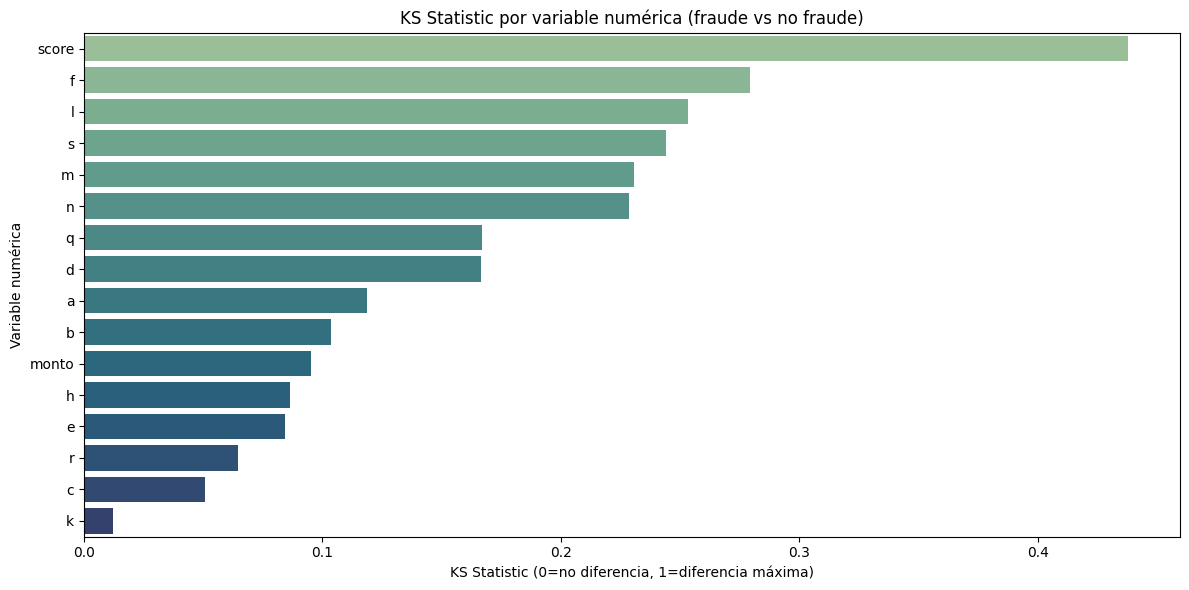

In [20]:
# Comparar la distribución de cada variable numérica entre clases usando la estadística de Kolmogorov-Smirnov (KS)

from scipy.stats import ks_2samp

# Lista para guardar resultados
ks_results = []

# Para cada variable numérica excepto la clase
for col in numericas_cols:
    vals0 = fraud_df[fraud_df['fraude'] == 0][col].dropna()
    vals1 = fraud_df[fraud_df['fraude'] == 1][col].dropna()
    ks_stat, ks_p = ks_2samp(vals0, vals1)
    ks_results.append({
        'variable': col,
        'KS_statistic': ks_stat,
        'p_value': ks_p
    })

# Mostrar ordenado por mayor diferencia KS
ks_df = pd.DataFrame(ks_results).sort_values('KS_statistic', ascending=False)
print("Comparación Kolmogorov-Smirnov (KS) para variables numéricas:")
display(ks_df)

# Visualización sencilla: KS statistic por variable
plt.figure(figsize=(12,6))
sns.barplot(data=ks_df, x='KS_statistic', y='variable', palette='crest')
plt.title("KS Statistic por variable numérica (fraude vs no fraude)")
plt.xlabel("KS Statistic (0=no diferencia, 1=diferencia máxima)")
plt.ylabel("Variable numérica")
plt.tight_layout()
plt.show()

In [21]:
# Filtrar y mostrar columnas con KS_statistic > 0.15
ks_mayor_015 = ks_df[ks_df['KS_statistic'] > 0.15]
print("Columnas con KS_statistic mayor a 0.15:")
display(ks_mayor_015)

Columnas con KS_statistic mayor a 0.15:


,variable,KS_statistic,p_value
15,score,0.437732,0.000000e+00
5,f,0.279276,0.000000e+00
8,l,0.253152,0.000000e+00
13,s,0.243896,0.000000e+00
9,m,0.230764,0.000000e+00
10,n,0.228594,0.000000e+00
11,q,0.167072,2.508575e-177
3,d,0.166407,6.502238e-176


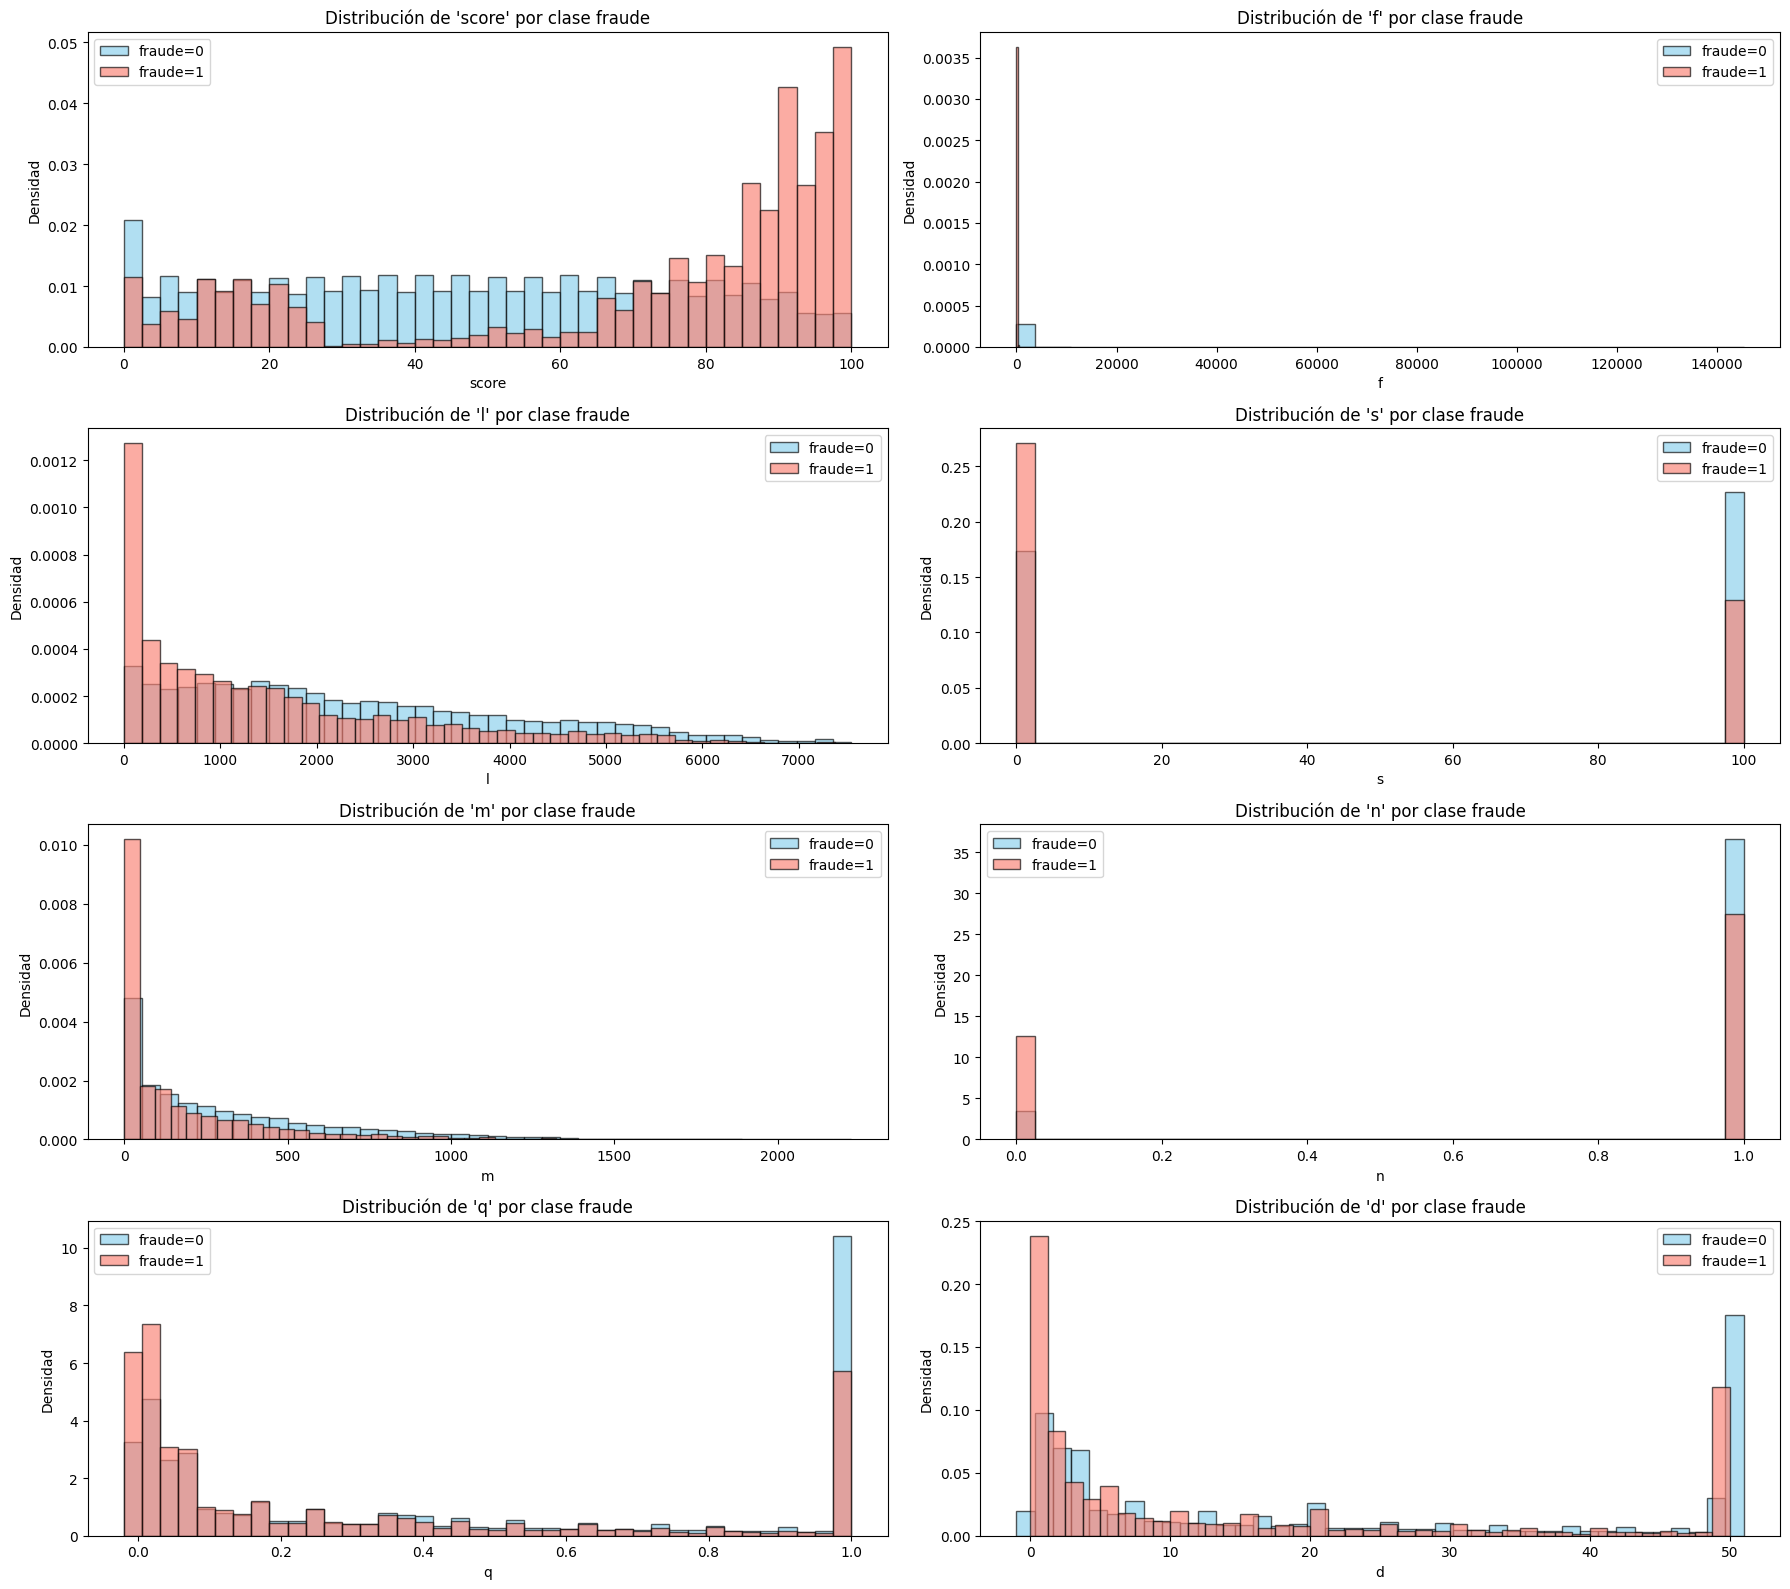

In [24]:
# Mostrar la distribución de variables con KS_statistic > 0.15 (histogramas por clase)
# Para cada variable con KS_statistic > 0.15, mostremos histogramas separados por clase "fraude"

import matplotlib.pyplot as plt

vars_ks = ks_mayor_015['variable'].tolist()
n_vars = len(vars_ks)
n_rows = (n_vars + 1) // 2

plt.figure(figsize=(18, 4 * n_rows))

for i, var in enumerate(vars_ks, 1):
    plt.subplot(n_rows, 2, i)
    # Histogramas para cada clase
    for clase, color in zip([0, 1], ['skyblue', 'salmon']):
        vals = fraud_df[fraud_df['fraude'] == clase][var].dropna()
        plt.hist(vals, bins=40, alpha=0.65, label=f"fraude={clase}", color=color, density=True, edgecolor='black')
    plt.title(f"Distribución de '{var}' por clase fraude")
    plt.xlabel(var)
    plt.ylabel("Densidad")
    plt.legend()

plt.tight_layout()
plt.show()


Top 10 correlaciones absolutas (Spearman) entre variables numéricas:


,Var1,Var2,abs(Spearman)
41,c,r,1.000000
168,q,d,0.979507
147,m,s,0.754668
53,d,m,0.722381
174,q,m,0.721486
125,l,f,0.664564
73,e,monto,0.653307
198,s,d,0.601297
206,s,q,0.600431
84,f,n,0.381638


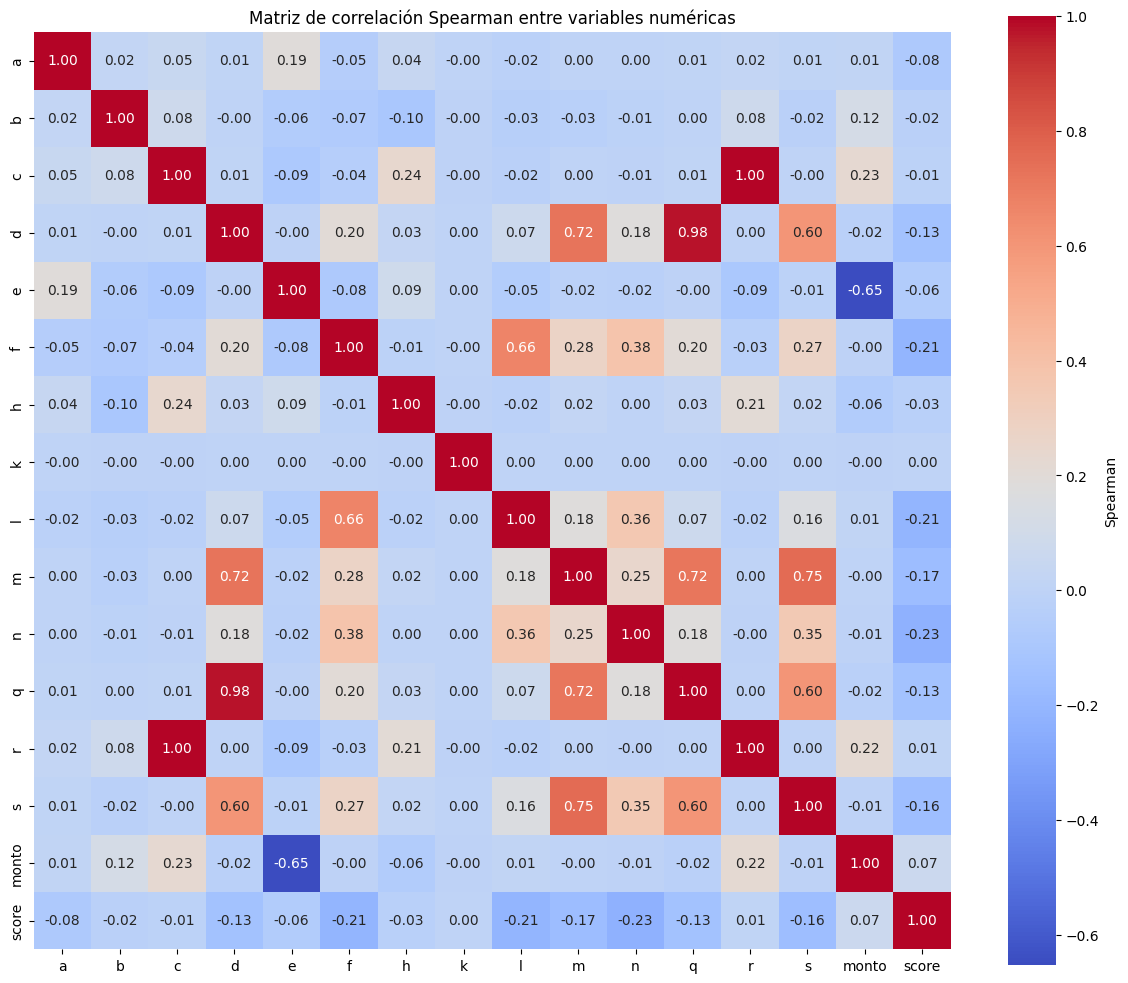

In [28]:
# Calcular la matriz de correlación Spearman solo para variables numéricas
numericas = ['a', 'b', 'c', 'd', 'e', 'f', 'h', 'k', 'l', 'm', 'n', 'q', 'r', 's', 'monto', 'score']
spearman_corr = fraud_df[numericas].corr(method='spearman')

# Para visualizar, mostramos las principales correlaciones absolutas entre variables
# Sacar la diagonal y obtener los pares de variables más correlacionados
import numpy as np
corr_pairs = (
    spearman_corr.abs()
    .where(~np.eye(spearman_corr.shape[0], dtype=bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Var1', 'Var2', 'abs(Spearman)']
# Eliminar duplicados (correlación es simétrica)
top_corr = corr_pairs.sort_values(by='abs(Spearman)', ascending=False).drop_duplicates(subset=['abs(Spearman)']).head(10)

print("Top 10 correlaciones absolutas (Spearman) entre variables numéricas:")
display(top_corr)

# Visualización: heatmap de correlación
plt.figure(figsize=(12,10))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'label': 'Spearman'})
plt.title("Matriz de correlación Spearman entre variables numéricas")
plt.tight_layout()
plt.show()



Wasserstein/JSD para comparar fraude vs no-fraude (discriminación)

JSD alto = variable útil para distinguir fraude
JSD bajo = variable irrelevante por sí sola

a 0.268	buena señal	
l 0.229	buena señal	
n 0.207	señal moderada	
m 0.193	señal moderada	
d 0.177	algo de señal

,variable,wasserstein,jensen_shannon
15,score,23.373377,0.396288
0,a,0.248775,0.267501
8,l,920.363420,0.229334
10,n,0.228594,0.207028
9,m,137.882020,0.192717
3,d,7.186115,0.177991
13,s,24.389558,0.174457
11,q,0.143543,0.145611
1,b,0.028301,0.123588
14,monto,30.227333,0.097193


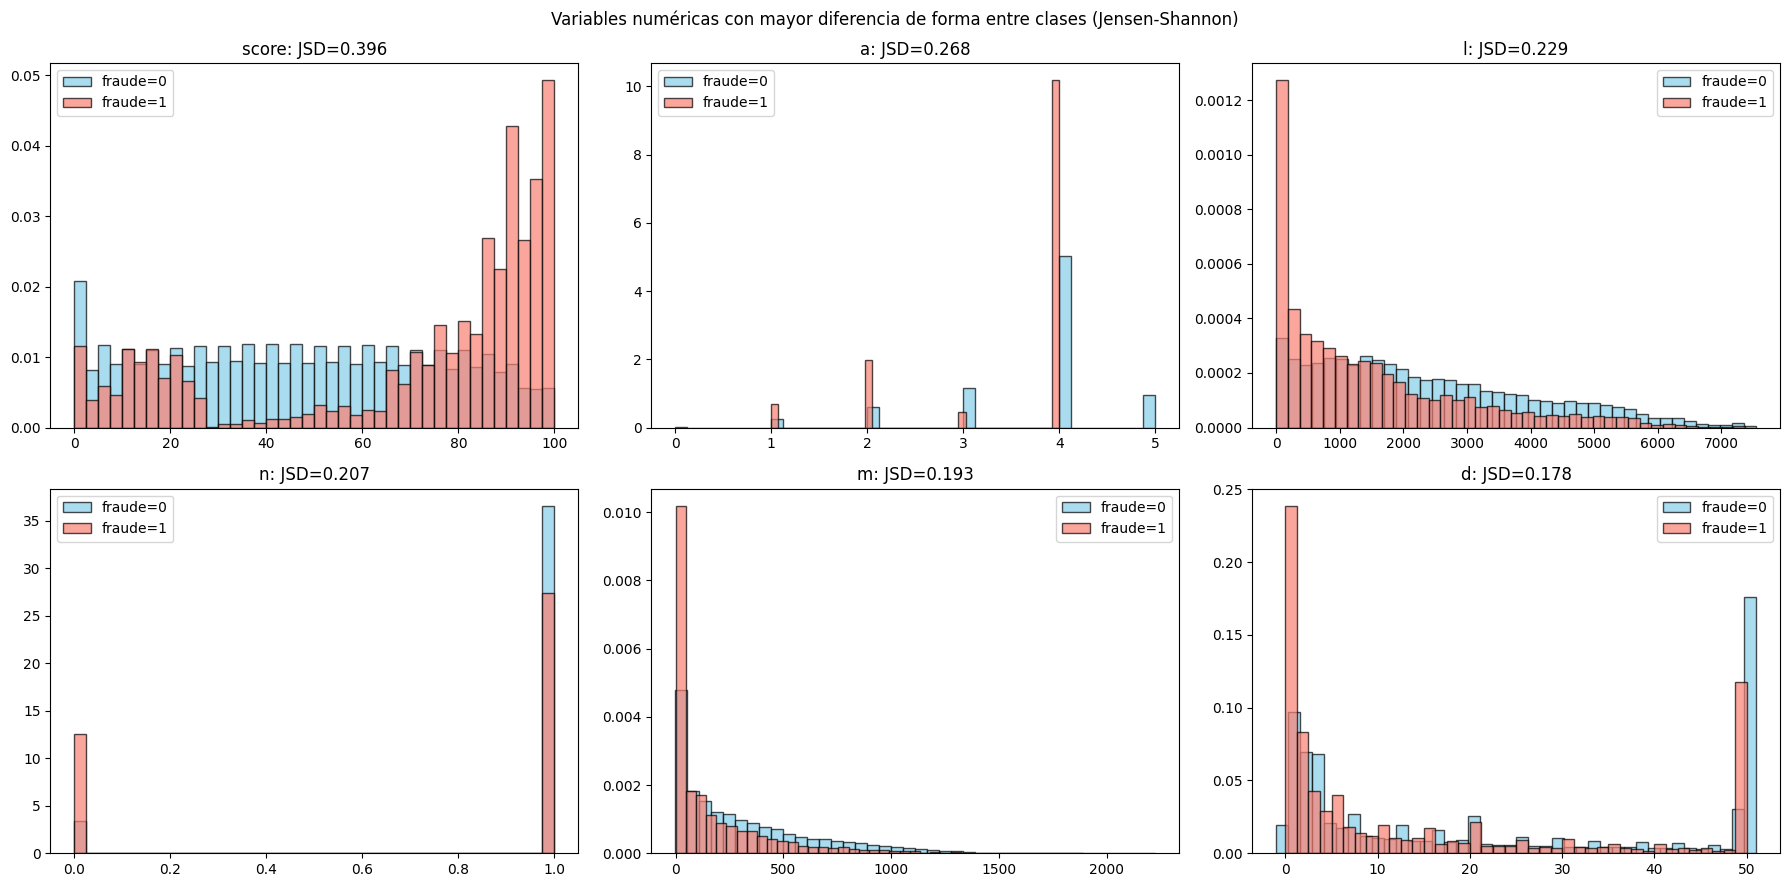

In [29]:
# Análisis de similitud de forma entre variables usando la distancia de Wasserstein y Jensen-Shannon
from scipy.stats import wasserstein_distance, entropy
from scipy.spatial.distance import jensenshannon

def variable_similarity_stats(df, variables, clase_col="fraude", bins=50):
    """
    Calcula distancia de Wasserstein y Jensen-Shannon entre las distribuciones
    de variables numéricas según la clase (fraude=0 vs fraude=1).
    
    Devuelve un DataFrame con las distancias para cada variable.
    """
    results = []
    for var in variables:
        valores_0 = df[df[clase_col]==0][var].dropna()
        valores_1 = df[df[clase_col]==1][var].dropna()
        
        # Definir bins comunes para histogramas normalizados
        data_min = min(valores_0.min(), valores_1.min())
        data_max = max(valores_0.max(), valores_1.max())
        bins_edges = np.linspace(data_min, data_max, bins+1)
        
        hist_0, _ = np.histogram(valores_0, bins=bins_edges, density=True)
        hist_1, _ = np.histogram(valores_1, bins=bins_edges, density=True)
        
        # Sumar una pequeña constante para evitar log(0) en JSD
        eps = 1e-8
        hist_0 = hist_0 + eps
        hist_1 = hist_1 + eps
        
        hist_0 /= hist_0.sum()
        hist_1 /= hist_1.sum()
        
        # Wasserstein (Earth Mover's Distance)
        wd = wasserstein_distance(valores_0, valores_1)
        # Jensen-Shannon (simetrizada, raíz cuadrada)
        jsd = jensenshannon(hist_0, hist_1)
        
        results.append({
            "variable": var,
            "wasserstein": wd,
            "jensen_shannon": jsd
        })
    res_df = pd.DataFrame(results).sort_values("jensen_shannon", ascending=False)
    return res_df

# Calcular similitud de forma para variables numéricas principales
shape_sim_df = variable_similarity_stats(fraud_df, numericas)
display(shape_sim_df)

# Visualización de las variables más "diferentes" en forma
top_jsd_vars = shape_sim_df.sort_values("jensen_shannon", ascending=False).head(6)["variable"]
fig, axs = plt.subplots(2, 3, figsize=(18,9))
for ax, var in zip(axs.flat, top_jsd_vars):
    for clase, color, alpha in zip([0, 1], ['skyblue', 'salmon'], [0.7, 0.7]):
        datos = fraud_df[fraud_df['fraude']==clase][var].dropna()
        ax.hist(datos, bins=40, alpha=alpha, color=color, label=f'fraude={clase}', density=True, edgecolor='black')
    ax.set_title(f"{var}: JSD={shape_sim_df.loc[shape_sim_df['variable']==var, 'jensen_shannon'].values[0]:.3f}")
    ax.legend()
plt.suptitle("Variables numéricas con mayor diferencia de forma entre clases (Jensen-Shannon)")
plt.tight_layout()
plt.show()


Analisis de variables categoricas

In [30]:
# Imprimir columnas categóricas y cantidad de valores únicos por cada una

# Seleccionar columnas categóricas (tipo object o category)
cat_cols = fraud_df.select_dtypes(include=['object', 'category']).columns

# Mostrar el nombre de la columna y la cantidad de valores únicos
for col in cat_cols:
    print(f"{col}: {fraud_df[col].nunique()} valores únicos")

g: 51 valores únicos
i: 127804 valores únicos
j: 8324 valores únicos
o: 2 valores únicos
p: 2 valores únicos
fecha: 145813 valores únicos


In [33]:
print("Valores que toma 'o':", fraud_df['o'].unique())
print("Valores que toma 'p':", fraud_df['p'].unique())
print("Valores que toma 'g':", fraud_df['g'].unique())

Valores que toma 'o': [nan 'Y' 'N']
Valores que toma 'p': ['N' 'Y']
Valores que toma 'g': ['BR' 'AR' 'UY' 'US' 'GB' nan 'SE' 'FR' 'MX' 'RU' 'CL' 'CO' 'AU' 'ES' 'IT'
 'PT' 'AD' 'CA' 'GE' 'EC' 'DE' 'CR' 'PY' 'BE' 'KR' 'HN' 'NI' 'GR' 'CH'
 'NZ' 'AE' 'IN' 'PR' 'BO' 'NL' 'CN' 'PE' 'TR' 'BS' 'PA' 'DO' 'EG' 'GH'
 'PH' 'UA' 'FI' 'TW' 'NO' 'LB' 'IL' 'JP' 'ZA']


In [9]:
# Mostrar tabla con los 10 valores únicos más frecuentes de 'g' y la cantidad de resultados en cada fila
g_counts_top10 = fraud_df['g'].value_counts().head(10).reset_index()
g_counts_top10.columns = ['g', 'cantidad']
display(g_counts_top10)


,g,cantidad
0,BR,185579
1,AR,53634
2,UY,5044
3,US,3794
4,SE,608
5,MX,402
6,RU,116
7,ES,114
8,CO,109
9,GB,68


In [5]:
# Imprimir los 10 valores más frecuentes de la columna 'i'
top10_i = fraud_df['i'].value_counts().head(10)
print("10 valores más frecuentes de 'i':")
print(top10_i)

10 valores más frecuentes de 'i':
i
Fone De Ouvido Sem Fio Xiaomi Airdots Preto                                                     137
Xiaomi Redmi Note 8 Dual Sim 64 Gb Azul-netuno 4 Gb Ram                                          81
Clean Sept - Álcool Em Gel 70% 500 Ml                                                            81
Máscara Descartável Tripla Com Elástico Proteção Anvisa 50un                                     77
Bebedouro Bomba Elétrica P Garrafão Galão Água Recarregável                                      68
Kit 10 Cuecas Box Boxer Microfibra Estampadas Originais                                          65
Streaming Media Player Google Chromecast 2nd Generation 256mb Preto Com Memória Ram De 512mb     63
Xiaomi Redmi Note 8 Dual Sim 64 Gb Preto-espacial 4 Gb Ram                                       59
Samsung Galaxy A30s Dual Sim 64 Gb Prism Crush Black 4 Gb Ram                                    56
Streaming Media Player Google Chromecast 3rd Generation Carbón C

In [6]:
# Imprimir los 10 valores más frecuentes de la columna 'i'
top10_i = fraud_df['j'].value_counts().head(10)
print("10 valores más frecuentes de 'j':")
print(top10_i)

10 valores más frecuentes de 'j':
j
cat_43b9c10    3697
cat_604df77    2987
cat_d69bed9    2978
cat_6c4cfdc    2418
cat_4249bd8    1984
cat_3203c7c    1870
cat_be0af8e    1739
cat_0820fab    1577
cat_8ef7164    1477
cat_d5975ae    1446
Name: count, dtype: int64


Variables numericos que tomen pocos valores

In [10]:
# Obtener columnas numéricas (int o float)
num_cols = fraud_df.select_dtypes(include=['number']).columns

# Imprimir la cantidad de valores únicos para cada variable numérica
for col in num_cols:
    print(f"{col}: {fraud_df[col].nunique()} valores únicos")

a: 6 valores únicos
b: 7672 valores únicos
c: 135090 valores únicos
d: 53 valores únicos
e: 43208 valores únicos
f: 1559 valores únicos
h: 61 valores únicos
k: 150000 valores únicos
l: 7389 valores únicos
m: 1882 valores únicos
n: 2 valores únicos
q: 52 valores únicos
r: 91391 valores únicos
s: 2 valores únicos
monto: 26333 valores únicos
score: 10142 valores únicos
fraude: 2 valores únicos


Los que tienen pocos valores unicos (menos de 100), los imprimí a continuacion para verlos bien

In [15]:
# Mostrar los valores únicos ordenados por frecuencia para las columnas a, b, s, d, q, h

import pandas as pd
from IPython.display import display

cols_to_check = ['a','n', 's', 'd', 'q', 'h']

for col in cols_to_check:
    val_counts = fraud_df[col].value_counts().reset_index()
    val_counts.columns = [col, 'frecuencia']
    print(f"\nValores únicos más frecuentes de '{col}':")
    display(val_counts)



Valores únicos más frecuentes de 'a':


,a,frecuencia
0,4,158087
1,3,35121
2,5,28773
3,2,18988
4,1,8132
5,0,899



Valores únicos más frecuentes de 'n':


,n,frecuencia
0,1,226788
1,0,23212



Valores únicos más frecuentes de 's':


,s,frecuencia
0,100,139856
1,0,110144



Valores únicos más frecuentes de 'd':


,d,frecuencia
0,50.0,47464
1,1.0,32642
2,2.0,22650
3,3.0,13074
4,49.0,9567
5,4.0,8935
6,51.0,8869
7,5.0,6751
8,0.0,6236
9,20.0,5570



Valores únicos más frecuentes de 'q':


,q,frecuencia
0,0.98,32990
1,1.00,32440
2,0.02,30763
3,0.00,20749
4,0.04,16843
5,0.06,10578
6,0.08,7759
7,0.10,5985
8,0.12,5053
9,0.38,4587



Valores únicos más frecuentes de 'h':


,h,frecuencia
0,1,19956
1,0,18378
2,2,14585
3,5,11313
4,3,10994
...,...,...
56,52,561
57,51,542
58,57,349
59,58,56


Identificar outliers en variables numericas

In [16]:
# Identificaremos outliers en las variables numéricas usando el método del IQR

import numpy as np

outliers_dict = {}

for col in num_cols:
    # Excluir columnas poco informativas, si aplica (como Unnamed: 0, fraude, etc.)
    if col in ['Unnamed: 0', 'fraude']:
        continue
    data = fraud_df[col].dropna()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Buscar índices/filas donde la variable sea un outlier
    outliers = fraud_df[(fraud_df[col] < lower_bound) | (fraud_df[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    total_count = data.shape[0]
    outliers_dict[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': outliers_count,
        'porcentaje': 100 * outliers_count / total_count if total_count > 0 else 0
    }
    print(f"{col}: {outliers_count} outliers ({outliers_dict[col]['porcentaje']:.2f}% de los datos)")

# Puedes mostrar un resumen en un DataFrame para mayor claridad
outliers_df = pd.DataFrame([
    {'variable': col, 
     'lower_bound': outliers_dict[col]['lower_bound'], 
     'upper_bound': outliers_dict[col]['upper_bound'],
     'outliers_count': outliers_dict[col]['outliers_count'],
     'porcentaje': outliers_dict[col]['porcentaje']}
    for col in outliers_dict
]).sort_values(by='porcentaje', ascending=False)

display(outliers_df)


a: 9031 outliers (3.61% de los datos)
b: 13981 outliers (6.12% de los datos)
c: 28154 outliers (12.32% de los datos)
d: 0 outliers (0.00% de los datos)
e: 12603 outliers (5.04% de los datos)
f: 28924 outliers (11.57% de los datos)
h: 8594 outliers (3.44% de los datos)
k: 0 outliers (0.00% de los datos)
l: 549 outliers (0.22% de los datos)
m: 7409 outliers (2.97% de los datos)
n: 23212 outliers (9.28% de los datos)
q: 0 outliers (0.00% de los datos)
r: 20545 outliers (8.22% de los datos)
s: 0 outliers (0.00% de los datos)
monto: 24336 outliers (9.73% de los datos)
score: 0 outliers (0.00% de los datos)


,variable,lower_bound,upper_bound,outliers_count,porcentaje
2,c,-193080.437500,347706.822500,28154,12.319824
5,f,-47.000000,81.000000,28924,11.570294
14,monto,-36.745000,88.255000,24336,9.734400
10,n,1.000000,1.000000,23212,9.284800
12,r,-295378.000000,523190.000000,20545,8.218000
1,b,0.485350,0.998550,13981,6.117903
4,e,-0.425501,0.709169,12603,5.041200
0,a,1.500000,5.500000,9031,3.612400
6,h,-24.000000,48.000000,8594,3.437600
9,m,-584.500000,1091.500000,7409,2.970658


### Analisis del Fraude

,mean_fraud,std_fraud,mean_no_fraud,std_no_fraud
a,3.509331,9.296582e-01,3.716967,0.907484
b,0.750961,1.516226e-01,0.726945,0.131772
c,384679.135844,1.089741e+06,253984.761870,831679.025633
d,14.866586,1.796004e+01,22.043243,20.111939
e,0.196602,6.723822e-01,0.223656,2.688736
f,18.745934,2.008662e+02,52.295192,691.371499
h,12.038923,1.343223e+01,14.327801,14.214245
k,0.500575,2.888231e-01,0.497507,0.288229
l,1432.313650,1.496984e+03,2352.674027,1710.648538
m,169.093403,2.491394e+02,306.948184,322.983757


/tmp/ipykernel_20667/1593380688.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraude', y=col, data=fraud_df, ax=ax, palette='Set2', showfliers=False)
/tmp/ipykernel_20667/1593380688.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Fraude', 'Fraude'])
/tmp/ipykernel_20667/1593380688.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraude', y=col, data=fraud_df, ax=ax, palette='Set2', showfliers=False)
/tmp/ipykernel_20667/1593380688.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

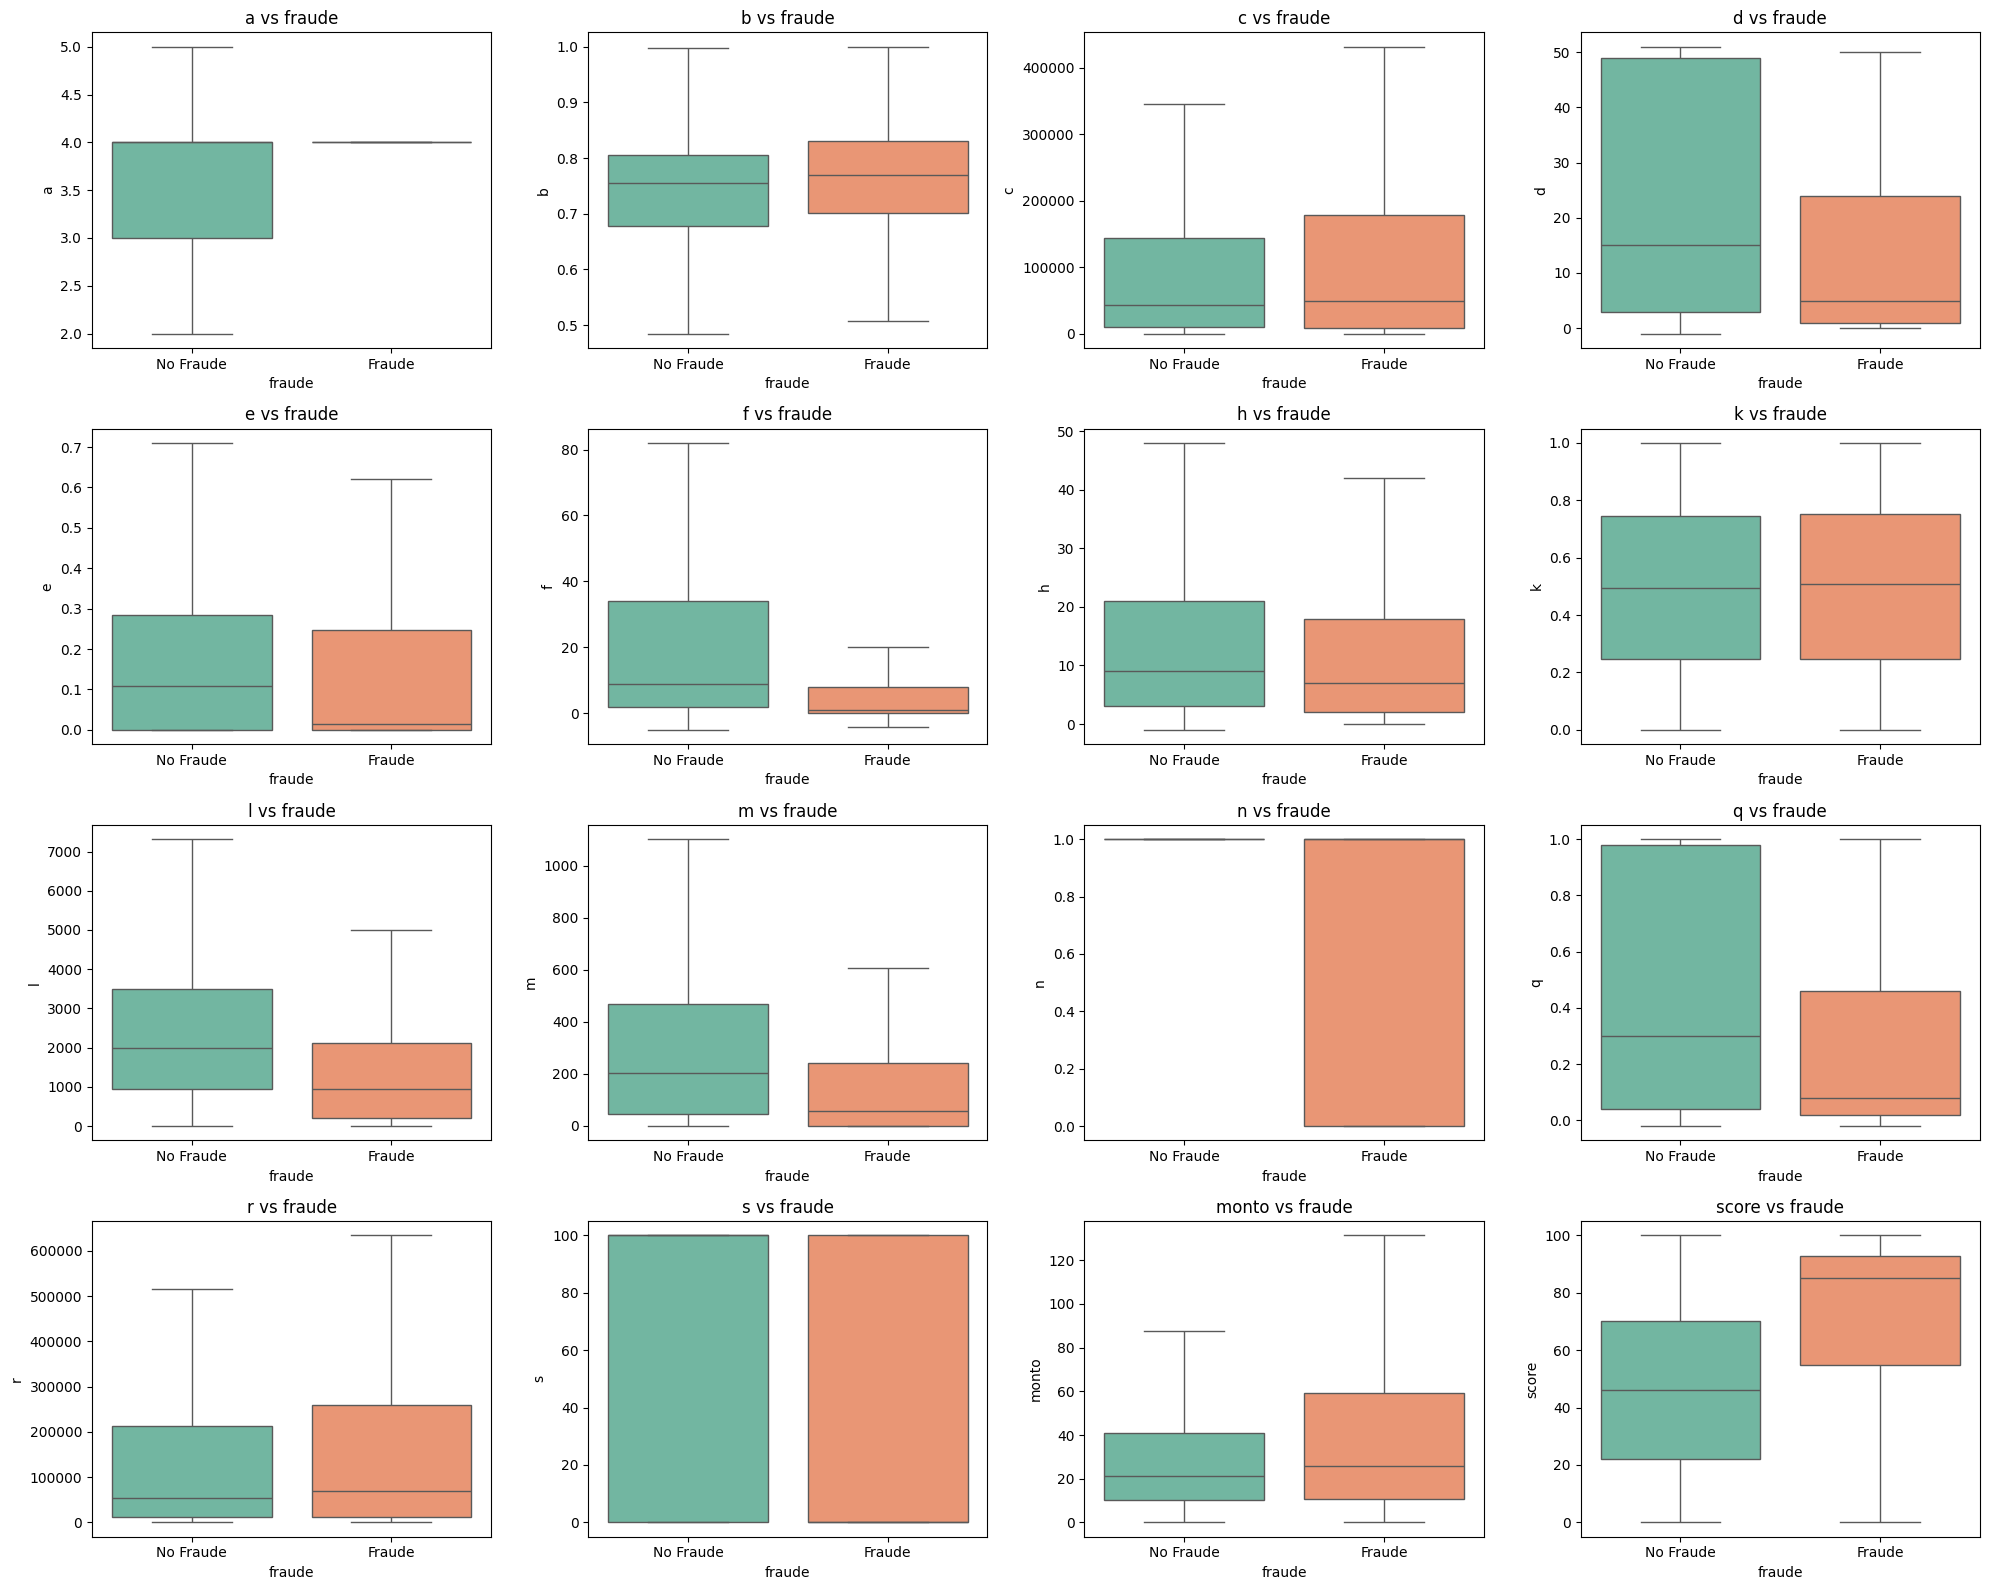

Variables con mayor diferencia relativa de medias (%):


,mean_fraud,std_fraud,mean_no_fraud,std_no_fraud,rel_diff_mean
monto,72.953943,1.648242e+02,42.731876,84.962220,70.724878
f,18.745934,2.008662e+02,52.295192,691.371499,-64.153618
c,384679.135844,1.089741e+06,253984.761870,831679.025633,51.457565
score,69.897227,3.208088e+01,46.523851,28.332886,50.239557
r,370950.336710,1.028498e+06,254534.300749,795491.151420,45.736875
m,169.093403,2.491394e+02,306.948184,322.983757,-44.911418
s,32.284724,4.675960e+01,56.674282,49.552640,-43.034613
l,1432.313650,1.496984e+03,2352.674027,1710.648538,-39.119758
q,0.287288,3.594816e-01,0.430830,0.402215,-33.317692
d,14.866586,1.796004e+01,22.043243,20.111939,-32.557174


In [17]:
# Comparación de características entre transacciones fraudulentas y normales

# Primero, identificamos cuáles son las variables más relevantes para comparar
cols_to_compare = [col for col in num_cols if col not in ['Unnamed: 0', 'fraude']]

import matplotlib.pyplot as plt
import seaborn as sns

fraud = fraud_df[fraud_df['fraude'] == 1]
no_fraud = fraud_df[fraud_df['fraude'] == 0]

# Creamos un resumen estadístico por grupo
summary_fraud = fraud[cols_to_compare].describe().T
summary_no_fraud = no_fraud[cols_to_compare].describe().T

# Unimos los resúmenes para fácil comparación
comparison_df = summary_fraud[['mean', 'std']].rename(columns={'mean':'mean_fraud', 'std':'std_fraud'})
comparison_df['mean_no_fraud'] = summary_no_fraud['mean']
comparison_df['std_no_fraud'] = summary_no_fraud['std']

display(comparison_df)

# Visualización: Boxplots lado a lado por variable
fig, axes = plt.subplots(nrows=int(np.ceil(len(cols_to_compare)/4)), ncols=4, figsize=(20, 4 * int(np.ceil(len(cols_to_compare)/4))))
axes = axes.flatten()

for i, col in enumerate(cols_to_compare):
    ax = axes[i]
    sns.boxplot(x='fraude', y=col, data=fraud_df, ax=ax, palette='Set2', showfliers=False)
    ax.set_title(f"{col} vs fraude")
    ax.set_xticklabels(['No Fraude', 'Fraude'])
plt.tight_layout()
plt.show()

# También podemos ver la diferencia relativa promedio entre los dos grupos
comparison_df['rel_diff_mean'] = 100 * (comparison_df['mean_fraud'] - comparison_df['mean_no_fraud']) / (comparison_df['mean_no_fraud'].replace(0, np.nan)).abs()
print("Variables con mayor diferencia relativa de medias (%):")
display(comparison_df.sort_values('rel_diff_mean', key=abs, ascending=False))



Revisando el grid de boxplots anterior me llama la atencion la columna "n", sea lo que sea eso solo los fraude toman valores de 0.
* Tal vez es verificacion en 2 pasos? Autenticacion de cuenta? Es algun tipo de flag

In [18]:
fraud_df['n']


0         1
1         1
2         1
3         1
4         1
         ..
249995    1
249996    1
249997    1
249998    1
249999    1
Name: n, Length: 250000, dtype: int64

Propociones diferentes de fraude por pais?

In [ ]:
# Calcular el porcentaje de fraude por país y el número de muestras por país
fraude_pais_stats = fraud_df.groupby('g').agg(
    porcentaje_fraude=('fraude', lambda x: 100 * x.mean()),
    cantidad_muestras=('fraude', 'size')
).reset_index()

# Calcular intervalo de confianza para porcentaje usando aproximación normal
from scipy.stats import norm

z = norm.ppf(0.975)
fraude_pais_stats['fraude_frac'] = fraude_pais_stats['porcentaje_fraude'] / 100
n = fraude_pais_stats['cantidad_muestras']
p = fraude_pais_stats['fraude_frac']
stderr = np.sqrt(p * (1 - p) / n)
err = z * stderr * 100  # convertir a porcentaje

fraude_pais_stats['ci_lower'] = fraude_pais_stats['porcentaje_fraude'] - err
fraude_pais_stats['ci_upper'] = fraude_pais_stats['porcentaje_fraude'] + err

# Ordenar de mayor a menor
fraude_pais_stats = fraude_pais_stats.sort_values('porcentaje_fraude', ascending=False)

# Plot: puntos con barras de error en lugar de barras
plt.figure(figsize=(14, 7))
plt.errorbar(
    fraude_pais_stats['g'],
    fraude_pais_stats['porcentaje_fraude'],
    yerr=[fraude_pais_stats['porcentaje_fraude'] - fraude_pais_stats['ci_lower'], 
          fraude_pais_stats['ci_upper'] - fraude_pais_stats['porcentaje_fraude']],
    fmt='o',
    capsize=6,
    color='tab:blue',
    ecolor='gray',
    elinewidth=2,
    markeredgewidth=2
)
plt.ylabel('Porcentaje de fraude (%)')
plt.xlabel('País')
plt.title('Porcentaje de fraude por país (con intervalo de confianza 95%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Recortado el anterior grafico para ver mejor

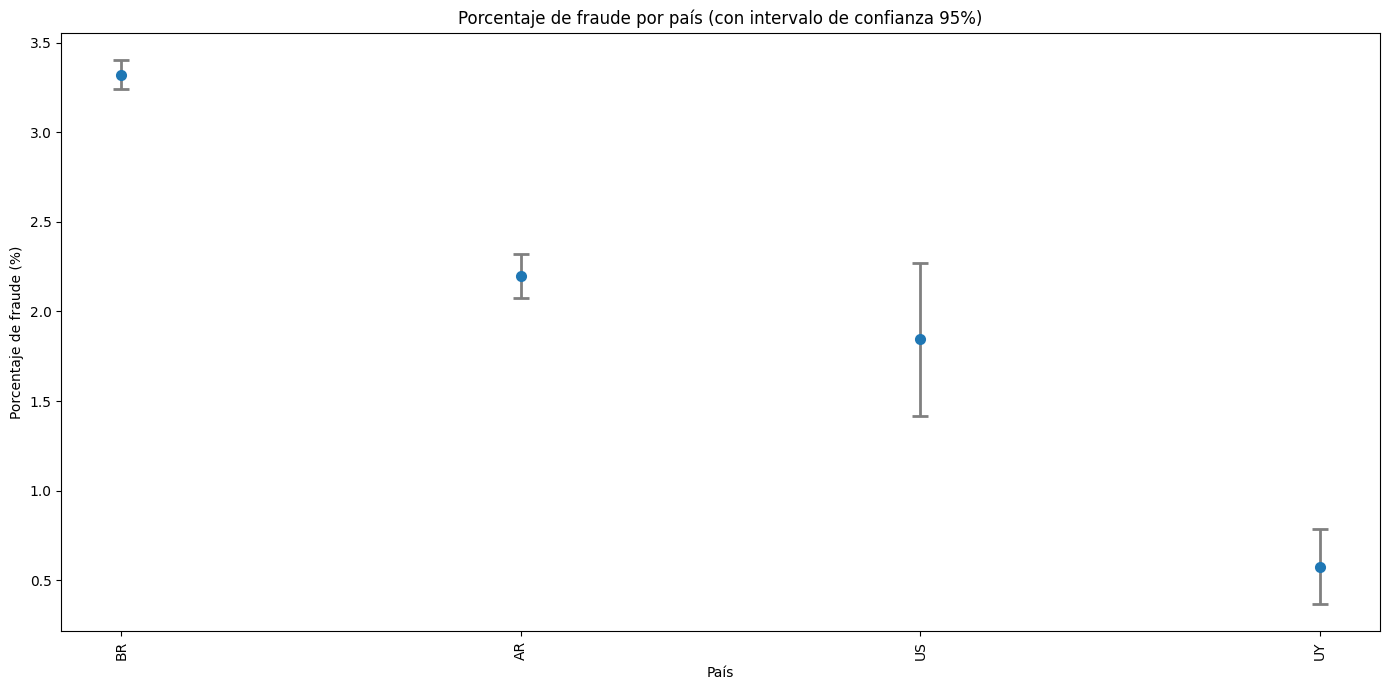

In [23]:
# Calcular el porcentaje de fraude por país y el número de muestras por país
fraude_pais_stats = fraud_df.groupby('g').agg(
    porcentaje_fraude=('fraude', lambda x: 100 * x.mean()),
    cantidad_muestras=('fraude', 'size')
).reset_index()

# Filtrar solo países con más de 1000 muestras
fraude_pais_stats = fraude_pais_stats[fraude_pais_stats['cantidad_muestras'] > 1000]

# Calcular intervalo de confianza para porcentaje usando aproximación normal
from scipy.stats import norm

z = norm.ppf(0.975)
fraude_pais_stats['fraude_frac'] = fraude_pais_stats['porcentaje_fraude'] / 100
n = fraude_pais_stats['cantidad_muestras']
p = fraude_pais_stats['fraude_frac']
stderr = np.sqrt(p * (1 - p) / n)
err = z * stderr * 100  # convertir a porcentaje

fraude_pais_stats['ci_lower'] = fraude_pais_stats['porcentaje_fraude'] - err
fraude_pais_stats['ci_upper'] = fraude_pais_stats['porcentaje_fraude'] + err

# Ordenar de mayor a menor
fraude_pais_stats = fraude_pais_stats.sort_values('porcentaje_fraude', ascending=False)

# Plot: puntos con barras de error en lugar de barras
plt.figure(figsize=(14, 7))
plt.errorbar(
    fraude_pais_stats['g'],
    fraude_pais_stats['porcentaje_fraude'],
    yerr=[fraude_pais_stats['porcentaje_fraude'] - fraude_pais_stats['ci_lower'], 
          fraude_pais_stats['ci_upper'] - fraude_pais_stats['porcentaje_fraude']],
    fmt='o',
    capsize=6,
    color='tab:blue',
    ecolor='gray',
    elinewidth=2,
    markeredgewidth=2
)
plt.ylabel('Porcentaje de fraude (%)')
plt.xlabel('País')
plt.title('Porcentaje de fraude por país (con intervalo de confianza 95%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Existe diferencia significativa en proporcion de fraude por pais? (parece que si)

In [25]:
from statsmodels.stats.proportion import proportions_ztest

# Seleccionar los países de interés
paises_interes = ['BR', 'AR', 'US', 'UY']
df_paises = fraud_df[fraud_df['g'].isin(paises_interes)]

# Calcular el número de fraudes y observaciones por país
conteos = df_paises.groupby('g')['fraude'].agg(['sum', 'count']).loc[paises_interes]

# Crear todas las combinaciones pareadas de países
from itertools import combinations

print("Comparación de proporciones de fraude entre pares de países ('g'):")
for pais1, pais2 in combinations(paises_interes, 2):
    count = [conteos.loc[pais1, 'sum'], conteos.loc[pais2, 'sum']]
    nobs = [conteos.loc[pais1, 'count'], conteos.loc[pais2, 'count']]
    stat, pval = proportions_ztest(count, nobs)
    print(f"{pais1} vs {pais2}: z = {stat:.3f}, p-value = {pval:.4g}")

Comparación de proporciones de fraude entre pares de países ('g'):
BR vs AR: z = 13.283, p-value = 2.901e-40
BR vs US: z = 5.046, p-value = 4.518e-07
BR vs UY: z = 10.856, p-value = 1.872e-27
AR vs US: z = 1.441, p-value = 0.1495
AR vs UY: z = 7.762, p-value = 8.343e-15
US vs UY: z = 5.616, p-value = 1.959e-08


**BR tiene tasa de fraude significativamente mayor que AR, US y UY** (z enormes, p≈0).

AR ≈ US (z=1.44, p=0.15 → no rechazás igualdad).

¿Vale la pena hacer un modelo distinto para Brasil?

In [26]:
import pandas as pd
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.multitest import multipletests
from itertools import combinations

# tasas por país
t = conteos.rename(columns={'sum':'fraudes','count':'n'})
t['rate'] = t['fraudes']/t['n']
t['ci_low'], t['ci_high'] = proportion_confint(t['fraudes'], t['n'], method='wilson')
t['lift_vs_global'] = t['rate'] / (fraud_df['fraude'].mean())
print(t[['fraudes','n','rate','ci_low','ci_high','lift_vs_global']])

# pares con efecto y FDR
rows, pvals = [], []
for a,b in combinations(t.index,2):
    count=[t.loc[a,'fraudes'], t.loc[b,'fraudes']]
    nobs=[t.loc[a,'n'],        t.loc[b,'n']]
    z, p = proportions_ztest(count, nobs)
    diff = t.loc[a,'rate'] - t.loc[b,'rate']
    rr = t.loc[a,'rate'] / t.loc[b,'rate'] if t.loc[b,'rate']>0 else float('inf')
    rows.append([a,b,z,p,diff,rr]); pvals.append(p)

rej, padj, *_ = multipletests(pvals, method='fdr_bh')
pairs = pd.DataFrame(rows, columns=['pais1','pais2','z','p','diff_rate','risk_ratio'])
pairs['p_fdr'] = padj; pairs['signif_fdr'] = rej
print(pairs.sort_values('p_fdr'))


    fraudes       n      rate    ci_low   ci_high  lift_vs_global
g                                                                
BR     6164  185579  0.033215  0.032409  0.034040        1.106870
AR     1179   53634  0.021982  0.020775  0.023258        0.732549
US       70    3794  0.018450  0.014630  0.023245        0.614842
UY       29    5044  0.005749  0.004006  0.008245        0.191596
  pais1 pais2          z             p  diff_rate  risk_ratio         p_fdr  \
0    BR    AR  13.283108  2.900980e-40   0.011233    1.510985  1.740588e-39   
2    BR    UY  10.855798  1.871656e-27   0.027466    5.777113  5.614969e-27   
4    AR    UY   7.762254  8.343308e-15   0.016233    3.823408  1.668662e-14   
5    US    UY   5.615586  1.958969e-08   0.012701    3.209060  2.938454e-08   
1    BR    US   5.045745  4.517579e-07   0.014765    1.800251  5.421095e-07   
3    AR    US   1.441452  1.494569e-01   0.003532    1.191442  1.494569e-01   

   signif_fdr  
0        True  
2        True  
4 

**BR**: tasa **3.32%** (IC 3.24–3.40). Lift **1.11** vs global &rarr; apenas 11% arriba del promedio.

- Las diferencias con AR/US/... son estadísticamente enormes por el N, pero el efecto absoluto es chico:<br>
  &nbsp;&nbsp;&bull; **BR–AR = 1.12 p.p.**, **BR–US = 1.48 p.p.**

**AR y US**: no presentan diferencias significativas tras corrección FDR (p=0.149). Sus ICs se superponen bastante.

**UY**: **0.57%** (IC 0.40–0.82). Lift **0.19** &rarr; 81% por debajo del promedio.<br>
Diferencias con todos los demás son fuertes y materialmente grandes (**3–6×** de riesgo relativo).

Posibles decisiones de negocio

**Factor de riesgo geográfico (feature geo_risk) con 3 niveles: {bajo=UY, medio=AR/US, alto=BR}.**

Revisión manual focalizada**: BR con monto alto y horas de riesgo → cola de revisión prioritaria. 


Monitoreo: alerta si el lift por país cambia >±25% semana a semana.

#### En que moneda esta el monto?

/tmp/ipykernel_20667/1003705377.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='g', y='monto', data=df_paises, palette='pastel')


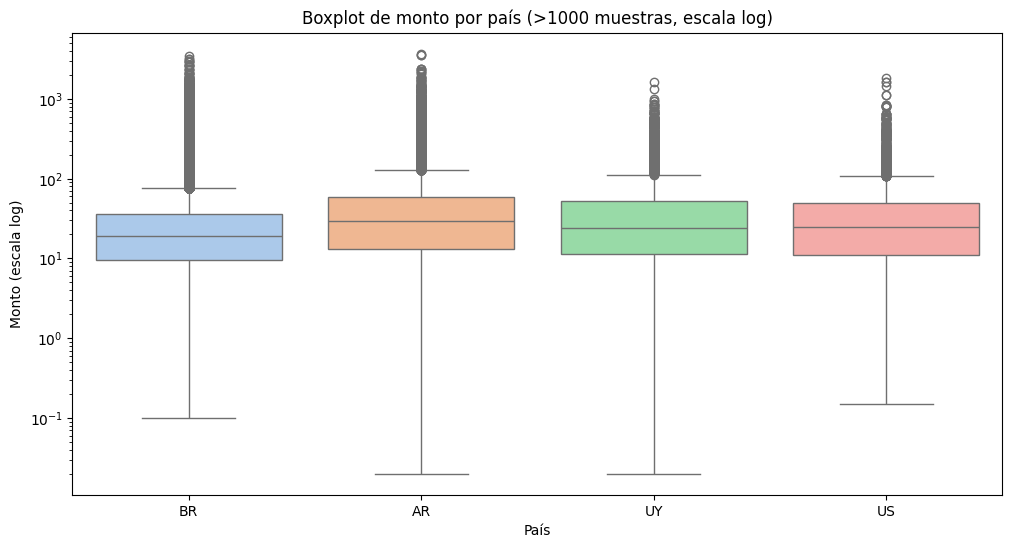

In [30]:
# Filtrar países con más de 1000 muestras
pais_counts = fraud_df['g'].value_counts()
paises_mas_1000 = pais_counts[pais_counts > 1000].index.tolist()
df_paises = fraud_df[fraud_df['g'].isin(paises_mas_1000)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='g', y='monto', data=df_paises, palette='pastel')
plt.yscale('log')
plt.title('Boxplot de monto por país (>1000 muestras, escala log)')
plt.xlabel('País')
plt.ylabel('Monto (escala log)')
plt.show()


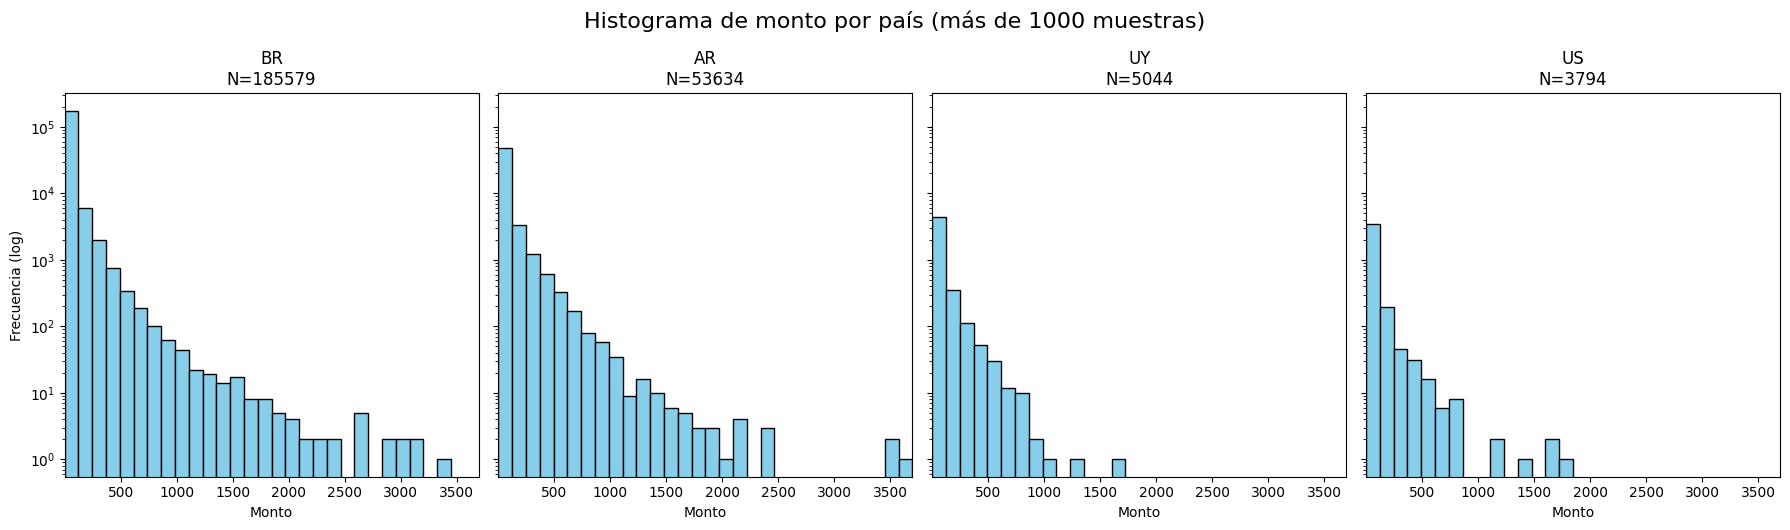

In [34]:
import numpy as np, matplotlib.pyplot as plt

# Histograma de monto por país con más de 1000 muestras
# Definir los mínimos y máximos para eje x común
monto_min = df_paises['monto'].min()
monto_max = df_paises['monto'].max()
bins = np.linspace(monto_min, monto_max, 31)  # 30 bins de igual tamaño (igual en todos)

fig, axes = plt.subplots(nrows=1, ncols=len(paises_mas_1000), figsize=(18, 5), sharey=True)
for i, pais in enumerate(paises_mas_1000):
    ax = axes[i] if len(paises_mas_1000) > 1 else axes
    datos_pais = df_paises[df_paises['g'] == pais]['monto']
    ax.hist(datos_pais, bins=bins, color='skyblue', edgecolor='black', log=True)
    ax.set_title(f"{pais}\nN={len(datos_pais)}")
    ax.set_xlabel("Monto")
    ax.set_xlim(monto_min, monto_max)
    if i == 0:
        ax.set_ylabel("Frecuencia (log)")
plt.tight_layout()
plt.suptitle("Histograma de monto por país (más de 1000 muestras)", y=1.05, fontsize=16)
plt.show()




Existen montos muy bajos?

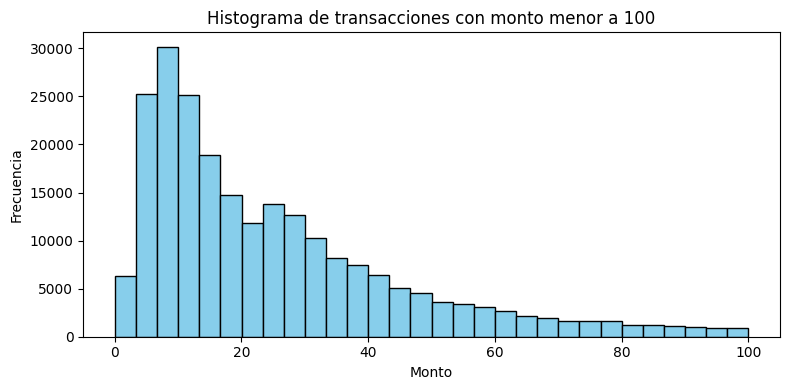

In [37]:
# Histograma de monto < 100
import matplotlib.pyplot as plt

monto_menor_100 = fraud_df[fraud_df["monto"] < 100]["monto"]

plt.figure(figsize=(8, 4))
plt.hist(monto_menor_100, bins=30, color='skyblue', edgecolor='black')
plt.title("Histograma de transacciones con monto menor a 100")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

Porque existen montos tan bajos? Son realmente transacciones? Errores de carga?

In [ ]:
# Transacciones con monto igual a 0
monto_cero = fraud_df[fraud_df["monto"] == 2]
monto_cero

,a,b,c,d,e,f,g,h,i,j,...,n,o,p,q,r,s,fecha,monto,score,fraude
65,4,0.5470,71444.09,24.0,2.713101,7.0,AR,39,Cuaderno De Caligrafia Nº 2 Plantec Normas Iram,cat_3203c7c,...,1,NaN,Y,0.46,71444,100,2020-04-06 12:16:18,2.0,36.00,0
12487,2,0.5000,7.88,50.0,0.000000,20.0,BR,0,Cartão Google Play Store Gift Card R$10 Reais ...,cat_5211252,...,1,NaN,Y,1.00,7,100,2020-04-03 22:58:54,2.0,90.00,0
15487,2,0.1991,434.72,21.0,0.000000,5.0,AR,2,Call Of Duty Deluxe Edition Digital Pc,cat_d5975ae,...,1,NaN,Y,0.42,434,100,2020-04-13 19:41:14,2.0,60.00,0
18609,4,0.3239,672.14,50.0,3.653769,13.0,AR,33,Ricardo Iorio Atesorando En Los Cielos Cd Nuev...,cat_12a8b9b,...,1,NaN,Y,1.00,672,100,2020-04-17 17:46:37,2.0,22.00,0
23194,2,0.7432,143.38,4.0,0.000000,32.0,BR,1,Forza Horizon 4 Edição Suprema- Pc E Xbox (onl...,cat_6c4cfdc,...,1,NaN,Y,0.08,143,100,2020-03-24 09:34:37,2.0,16.00,0
29805,4,0.7190,97917.11,50.0,0.847619,46.0,BR,35,Cabo Adaptador P3 ( P2 Combo ) X Fone Headset ...,cat_fd8d8c5,...,1,NaN,N,1.00,97917,0,2020-04-08 18:24:02,2.0,8.00,0
44645,4,0.6930,100695.71,29.0,0.890891,28.0,BR,25,Pinos Fixar Alça Tampão Porta-mala 206 207 C3 ...,cat_fa9a5a0,...,1,NaN,Y,0.58,100695,100,2020-04-03 10:06:20,2.0,63.00,0
49372,1,0.7555,9541.02,15.0,0.730303,0.0,BR,0,Esmalte Risqué Diamond Gel Noz Moscada Cremoso...,cat_1df0a5f,...,1,NaN,N,0.28,9541,0,2020-03-24 08:18:40,2.0,86.00,0
52637,2,0.4106,488.46,50.0,0.000000,53.0,AR,26,El Método Wyckoff - Enrique Diaz Valdecantos,cat_3203c7c,...,1,NaN,Y,0.98,488,100,2020-03-15 22:06:05,2.0,92.00,0
56751,4,NaN,NaN,1.0,2.102336,0.0,BR,46,Par De Chaveta Bicicleta Antiga Phillps Raleig...,cat_5bb011e,...,0,N,N,0.00,260445,0,2020-03-09 23:05:42,2.0,97.00,0


In [44]:
# Frecuencia de valores en columna j (top 20)
frecuencia_j = fraud_df['j'].value_counts(dropna=False).reset_index()
frecuencia_j.columns = ['j', 'frecuencia']
frecuencia_j = frecuencia_j.head(20)
frecuencia_j

,j,frecuencia
0,cat_43b9c10,3697
1,cat_604df77,2987
2,cat_d69bed9,2978
3,cat_6c4cfdc,2418
4,cat_4249bd8,1984
5,cat_3203c7c,1870
6,cat_be0af8e,1739
7,cat_0820fab,1577
8,cat_8ef7164,1477
9,cat_d5975ae,1446


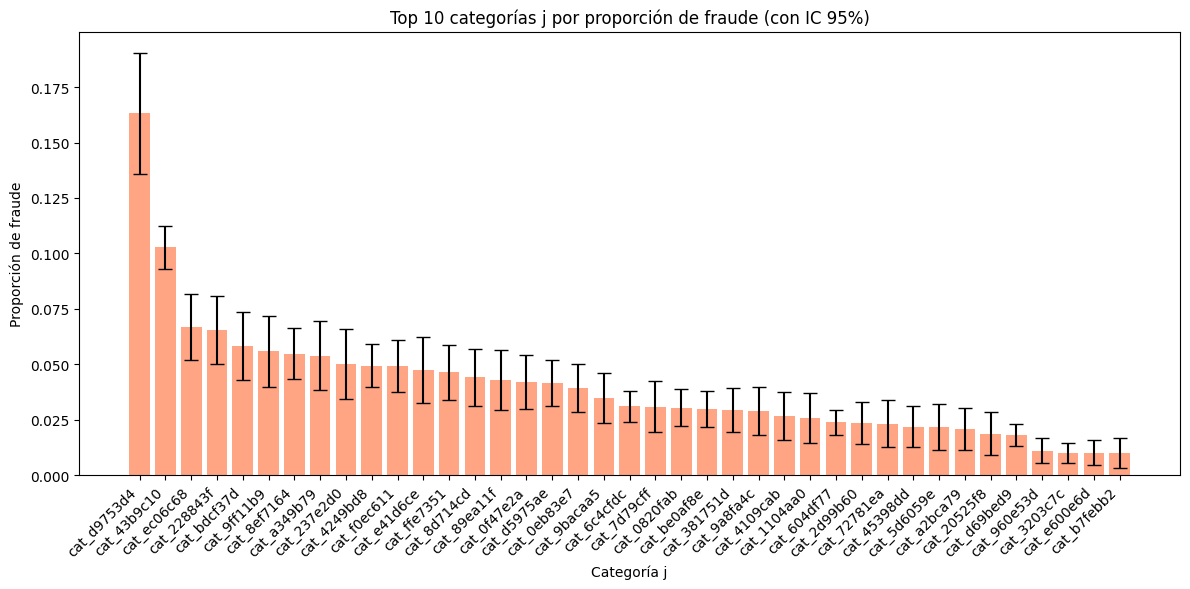

In [52]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Calcular proporción de fraude por categoría de 'j'
cat_counts = fraud_df.groupby('j').size()
cat_frauds = fraud_df.groupby('j')['fraude'].sum()
cat_props = cat_frauds / cat_counts

# Filtrar solo categorías con más de 100 muestras
mask = cat_counts > 700
cat_counts_fil = cat_counts[mask]
cat_props_fil = cat_props[mask]

# Calcular intervalo de confianza del 95% para la proporción
z = norm.ppf(0.975)  # 95% IC

intervalos = []
for j_cat in cat_counts_fil.index:
    n = cat_counts_fil[j_cat]
    p = cat_props_fil[j_cat]
    se = np.sqrt(p * (1 - p) / n)
    ic_lower = max(0, p - z*se)
    ic_upper = min(1, p + z*se)
    intervalos.append([j_cat, n, p, ic_lower, ic_upper])

# Crear DataFrame con los resultados
df_ic = pd.DataFrame(intervalos, columns=["j", "n_muestras", "proporcion_fraude", "ic_95_inf", "ic_95_sup"])
df_ic = df_ic.sort_values("proporcion_fraude", ascending=False)
df_ic.reset_index(drop=True, inplace=True)
df_ic.head(10)  # Mostrar top 10 categorías con mayor proporción de fraude

import matplotlib.pyplot as plt

# Seleccionar las 10 categorías con mayor proporción de fraude
top10 = df_ic

plt.figure(figsize=(12,6))
bars = plt.bar(top10['j'], top10['proporcion_fraude'], yerr=[top10['proporcion_fraude']-top10['ic_95_inf'], top10['ic_95_sup']-top10['proporcion_fraude']], capsize=5, color="coral", alpha=0.7)
plt.ylabel("Proporción de fraude")
plt.xlabel("Categoría j")
plt.title("Top 10 categorías j por proporción de fraude (con IC 95%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [54]:
# Mostrar productos con la categoría 'cat_d9754d4' en la columna 'j'
productos_cat_d9754d4 = fraud_df[fraud_df['j'] == 'cat_d9753d4']
display(productos_cat_d9754d4)

,a,b,c,d,e,f,g,h,i,j,...,n,o,p,q,r,s,fecha,monto,score,fraude
16,2,NaN,NaN,1.0,0.00000,1.0,BR,0,Chaveiro Lindo Do Thor,cat_d9753d4,...,0,NaN,N,0.02,260445,0,2020-03-28 17:09:53,5.46,91.00,1
460,2,1.0000,5.50,1.0,0.00000,1.0,BR,0,Kit Chaveiro Brasil,cat_d9753d4,...,1,N,N,0.00,5,0,2020-04-02 23:41:02,5.50,95.00,1
556,2,1.0000,5.67,1.0,0.00000,26.0,BR,0,Chaveiro Lindo Do Thanos,cat_d9753d4,...,1,N,N,0.02,5,0,2020-03-27 21:27:19,5.43,94.00,1
1087,3,1.0000,27.76,5.0,0.00000,20.0,BR,0,Tear Afegão Serenity Loms Manta Cobertor Tapet...,cat_d9753d4,...,1,N,N,0.10,27,0,2020-03-19 14:24:13,7.47,90.00,1
1426,2,0.7492,30.15,50.0,0.00000,27.0,BR,1,Produto Spo Original Super Promoçao,cat_d9753d4,...,1,Y,Y,0.98,30,100,2020-04-17 18:06:02,4.53,46.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247824,2,0.6117,1832.61,50.0,0.52381,22.0,BR,11,Dvd Elle (2019) Filme Dublado E Legendado,cat_d9753d4,...,1,Y,Y,1.00,1832,100,2020-03-16 11:43:56,4.98,42.89,0
247903,3,0.5667,5444.49,49.0,0.00000,2.0,BR,3,Estratégia Day Trade - Mini Dólar - Scalping,cat_d9753d4,...,1,NaN,Y,0.98,5444,100,2020-04-12 19:08:36,9.77,2.80,0
248418,3,0.6723,538.45,1.0,20.40000,0.0,BR,3,Suspensao Recondicionada,cat_d9753d4,...,0,NaN,N,0.02,538,0,2020-03-18 11:55:10,11.80,98.81,0
249118,2,NaN,NaN,16.0,0.00000,5.0,AR,3,Alquiler De Mesas Y Sillas - C.a.b.a Y G.b.a. ...,cat_d9753d4,...,1,NaN,N,0.30,260445,0,2020-03-09 12:36:36,9.59,82.43,0


Podemos ponerle nombre a las categorias?

In [59]:
cat_to_names[['j', 'palabras_topic']]

,j,palabras_topic
0,cat_011add0,"kit, com, para, mascara"
1,cat_0130aa9,"kit, com, para, mascara"
2,cat_0175a99,"led, 220v, 110v, kit"
3,cat_018ca97,"led, 220v, 110v, kit"
4,cat_01a1725,"kit, com, para, mascara"
...,...,...
481,cat_fd8d8c5,"usb, hd, mujer, hombre"
482,cat_fdf37f7,"farol, par, capa, 2012"
483,cat_feb8e6e,"kit, com, para, mascara"
484,cat_ff61796,"usb, hd, mujer, hombre"


In [60]:
# Mostrar 10 productos para la categoría 'cat_011add0'
cat_ejemplo_1 = 'cat_011add0'
productos_cat_1 = fraud_df[fraud_df['j'] == cat_ejemplo_1]['i'].dropna().astype(str).unique()[:10]
print(f"10 productos para la categoría {cat_ejemplo_1}:")
for prod in productos_cat_1:
    print("-", prod)

print("\n")

# Mostrar 10 productos para la categoría 'cat_0130aa9'
cat_ejemplo_2 = 'cat_0130aa9'
productos_cat_2 = fraud_df[fraud_df['j'] == cat_ejemplo_2]['i'].dropna().astype(str).unique()[:10]
print(f"10 productos para la categoría {cat_ejemplo_2}:")
for prod in productos_cat_2:
    print("-", prod)

10 productos para la categoría cat_011add0:
- Protetor Labial Fruit Shine Morango 4,8g - Nivea
- Pênis Grande Escroto Ventosa Lubrificante Brinde
- Laneige Lip Balm Coreano Morango 3g
- Laneige Lip Sleeping Mask Berry - Miniatura 3g
- 10 Máscara Descartável Valvula 3m Poeiras Névoas Fumos 8822
- Kit Erótico Revenda Sexshop 25 Produtos Atacado Anel Companh
- Kit Erótico 25 Produtos Anel Companheiro Revenda Atacado
- Kit Erotico 25 Produtos Ponto G Vibrador Revenda Sexshop
- Kit Sexshop 25un Plug Anal Térmico De Metal Sexyshop Anal
- Kit Feminino Sexshop Atacado Vibrador Lubrificante Fantasia


10 productos para la categoría cat_0130aa9:
- Óculos Para Por  De Grau Rêtro Leve Fibra Carbono /acetato
- Óculos Descanso Perto Retro +0,5 Até +3,0 Graus
- Oculos De Grau Armação Feminino Gatinho Retro Vintage Óculos
- Óculos Armação Com Grau Leitura Perto +3.75 Quadrado
- Oculos Rosa Armação De Grau Rose Grande Haste De Metal
- Armação Grau Round Redondo Dourado Feminino Masculino Luxo
- Óculos 

In [72]:
import pandas as pd
import re

# 1) Preprocesar y tokenizar con vectorización
df_tok = (
    fraud_df[['j','i']]
      .dropna(subset=['i'])
      .assign(
          i=lambda d: d['i'].astype('string'),
          # normalizá si querés: .str.normalize('NFKD').str.encode('ascii','ignore').str.decode()
          tokens=lambda d: d['i'].str.lower().str.findall(r"[a-záéíóúñü0-9]+")
      )
      .explode('tokens')
      .rename(columns={'tokens':'token'})
)

# (Opcional) Sacar stopwords comunes, ignorar números y filtrar palabras de más de 2 letras
stop = {"de","la","el","y","para","en","con","por","del","los","las","a","un","una"}
df_tok = df_tok[
    ~df_tok['token'].isin(stop) &
    ~df_tok['token'].str.isnumeric() &
    (df_tok['token'].str.len() > 2)
]

# 2) Contar por categoría y palabra
vc = (
    df_tok.groupby('j')['token']
          .value_counts(sort=True)
          .groupby(level=0)
          .head(10)                              # top 10 por categoría
          .reset_index(name='freq')
)

# 3) Devolver en el formato pedido
df_top_palabras = (
    vc.groupby('j')['token']
      .agg(lambda s: ', '.join(s))
      .reset_index(name='10_palabras_mas_comunes')
)

display(df_top_palabras)


,j,10_palabras_mas_comunes
0,cat_0005972,"ardentes, buttman, desejos, fresh, frete, meat..."
1,cat_00115ef,"rms, falante, woofer, alto, ohms, polegadas, p..."
2,cat_0013c63,"cooler, b240xhu, b251xhu, bangho, c230, disipa..."
3,cat_001bdea,"cadeira, alumínio, pesca, barco, camping, desm..."
4,cat_0023dc4,"1ra, ceramica, piso, blanco, lourdes, pared, c..."
...,...,...
8319,cat_ffdf1e2,"agua, canilla, esferica, genebre, presión, vál..."
8320,cat_ffe1c2f,"aparelho, cavita, celulite, corporal, estético..."
8321,cat_ffe6d8e,"doctor, gay, livro"
8322,cat_ffe7351,"moletom, blusa, now, united, casaco, frio, fem..."


In [73]:
df_top_palabras.to_csv('top_palabras_por_categoria.csv', index=False)

In [74]:
fraud_df[fraud_df['j'] == 'cat_d9753d4']

,a,b,c,d,e,f,g,h,i,j,...,n,o,p,q,r,s,fecha,monto,score,fraude
16,2,NaN,NaN,1.0,0.00000,1.0,BR,0,Chaveiro Lindo Do Thor,cat_d9753d4,...,0,NaN,N,0.02,260445,0,2020-03-28 17:09:53,5.46,91.00,1
460,2,1.0000,5.50,1.0,0.00000,1.0,BR,0,Kit Chaveiro Brasil,cat_d9753d4,...,1,N,N,0.00,5,0,2020-04-02 23:41:02,5.50,95.00,1
556,2,1.0000,5.67,1.0,0.00000,26.0,BR,0,Chaveiro Lindo Do Thanos,cat_d9753d4,...,1,N,N,0.02,5,0,2020-03-27 21:27:19,5.43,94.00,1
1087,3,1.0000,27.76,5.0,0.00000,20.0,BR,0,Tear Afegão Serenity Loms Manta Cobertor Tapet...,cat_d9753d4,...,1,N,N,0.10,27,0,2020-03-19 14:24:13,7.47,90.00,1
1426,2,0.7492,30.15,50.0,0.00000,27.0,BR,1,Produto Spo Original Super Promoçao,cat_d9753d4,...,1,Y,Y,0.98,30,100,2020-04-17 18:06:02,4.53,46.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247824,2,0.6117,1832.61,50.0,0.52381,22.0,BR,11,Dvd Elle (2019) Filme Dublado E Legendado,cat_d9753d4,...,1,Y,Y,1.00,1832,100,2020-03-16 11:43:56,4.98,42.89,0
247903,3,0.5667,5444.49,49.0,0.00000,2.0,BR,3,Estratégia Day Trade - Mini Dólar - Scalping,cat_d9753d4,...,1,NaN,Y,0.98,5444,100,2020-04-12 19:08:36,9.77,2.80,0
248418,3,0.6723,538.45,1.0,20.40000,0.0,BR,3,Suspensao Recondicionada,cat_d9753d4,...,0,NaN,N,0.02,538,0,2020-03-18 11:55:10,11.80,98.81,0
249118,2,NaN,NaN,16.0,0.00000,5.0,AR,3,Alquiler De Mesas Y Sillas - C.a.b.a Y G.b.a. ...,cat_d9753d4,...,1,NaN,N,0.30,260445,0,2020-03-09 12:36:36,9.59,82.43,0


In [76]:
# Mostrar productos de la categoría cat_0082695
productos_cat_0082695 = fraud_df[fraud_df['j'] == 'cat_0082695']
display(productos_cat_0082695)

,a,b,c,d,e,f,g,h,i,j,...,o,p,q,r,s,fecha,monto,score,fraude,incluye_grat
67331,4,NaN,NaN,1.0,0.5575,36.0,BR,1,Gaseificador Domestico,cat_0082695,...,NaN,N,0.02,260445,0,2020-04-12 09:21:57,22.64,55.00,0,False
115169,4,0.8219,15694.47,50.0,0.0000,10.0,BR,6,Sodastream - Máquina Para Gaseificar Água Jet ...,cat_0082695,...,NaN,Y,0.98,15694,100,2020-04-12 14:06:59,113.03,7.00,0,False
184037,3,NaN,NaN,0.0,0.5575,37.0,BR,0,Gaseificador Domestico,cat_0082695,...,NaN,N,0.02,260445,0,2020-04-12 09:21:57,25.03,53.48,0,False


## FRECUENCIA DE FRAUDE
A continuacion hay un analisis medio superficial para ver que pasa con las operaciones repetidas.

Quiero ver si hay productos que se compran muchas veces y siempre son fraude (esto pasa)

Tambien ver si hay algun patron en los productos que tienen gran proporcion de fraude. (Nombres cortos, montos raros)

Tambien hay que ver si cambia el "score" de fraude a lo largo de las transacciones. Cada vez esta mas seguro? Es inestable?
* Habria que considerar las transacciones repetidas

In [82]:
# Mostrar productos que son fraude
productos_fraude = fraud_df[fraud_df['fraude'] == 1]
display(productos_fraude)


,a,b,c,d,e,f,g,h,i,j,...,fecha,monto,score,fraude,incluye_grat,incluye_porn,incluye_anal,incluye_sex,contiene_keywords,contiene_porno
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,...,2020-04-02 10:24:45,3.53,76.0,1,False,False,False,False,False,False
16,2,NaN,NaN,1.0,0.000000,1.0,BR,0,Chaveiro Lindo Do Thor,cat_d9753d4,...,2020-03-28 17:09:53,5.46,91.0,1,False,False,False,False,False,False
45,4,0.6545,26895.88,4.0,0.000000,28.0,BR,55,Teclado Macbook Pro A1278 Us,cat_df60aa8,...,2020-03-19 12:27:13,25.68,73.0,1,False,False,False,False,False,False
69,4,0.8162,12121.97,30.0,0.189189,3.0,BR,55,Bota Masculina Coturno Venetto Couro Legítimo ...,cat_9bacaa5,...,2020-03-20 10:04:31,20.46,46.0,1,False,False,False,False,False,False
81,2,0.8840,3820.04,3.0,0.000000,2.0,BR,0,"Álcool Gel 70% Antisséptico -1 Gl 5 Lt.=140,00...",cat_d0759b1,...,2020-03-27 21:08:55,36.93,88.0,1,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149948,4,0.7796,106975.47,28.0,0.197708,73.0,BR,0,100 Un Luva De Procedimento Descartável Vinil ...,cat_10ef367,...,2020-03-29 11:17:54,6.95,10.0,1,False,False,False,False,False,False
149958,4,0.5125,11178.20,50.0,0.000000,1.0,BR,1,Kit Borrachinha Aparelho Ortodôntico Personali...,cat_c434c0f,...,2020-03-17 09:08:27,25.75,87.0,1,False,False,False,False,False,False
149964,4,0.7969,23627.22,1.0,0.000000,0.0,BR,4,(par) Friso Cromo Polo Virtus Original 6ea8537...,cat_411b0d2,...,2020-03-14 21:33:54,36.35,92.0,1,False,False,False,False,False,False
149985,2,0.7105,733898.72,7.0,0.000000,11.0,UY,5,Silla Ejecutiva Miles Con Masajes Premium Supe...,cat_eb51b04,...,2020-04-03 11:15:21,112.93,11.0,1,False,False,False,False,False,False


In [ ]:
# Productos "i" (nombre/título) con mayor cantidad de fraude, cantidad no fraude y proporción de fraude
df_prod = fraud_df[['i', 'fraude']].copy()
# Precalculamos
df_prod['cantidad_fraude'] = (df_prod['fraude'] == 1).astype(int)
df_prod['cantidad_no_fraude'] = (df_prod['fraude'] == 0).astype(int)

# Agrupamos de forma eficiente
productos_fraude_stats = (
    df_prod
    .groupby('i')
    .agg(
        cantidad_fraude = ('cantidad_fraude', 'sum'),
        cantidad_no_fraude = ('cantidad_no_fraude', 'sum'),
        proporcion_fraude = ('fraude', 'mean')
    )
    .reset_index()
    .sort_values(by='cantidad_fraude', ascending=False)
)

display(productos_fraude_stats.head(30))


,i,cantidad_fraude,cantidad_no_fraude,proporcion_fraude
116349,Tapete Ilustrativo Pista Carrinho Hot Wheels 0...,44,5,0.897959
15980,Bateria Moura 70 Amperes - Passat - Santana - ...,24,0,1.000000
18666,Bola Oficial,22,0,1.000000
33727,"Chaleira Elétrica Lenoxx 1,8 Litros Express Pc...",20,4,0.833333
34323,Chaveiro Oficial Jr,17,0,1.000000
108960,Samsung Galaxy A30s Dual Sim 64 Gb Prism Crush...,11,33,0.250000
9456,Amazon Gif,10,0,1.000000
100496,Poster,10,0,1.000000
42985,Curso Marcus Trombetta- A Riqueza Está Na Mente,10,0,1.000000
42963,Curso De Inglês Aprenda Corretamente Vocabulár...,9,0,1.000000


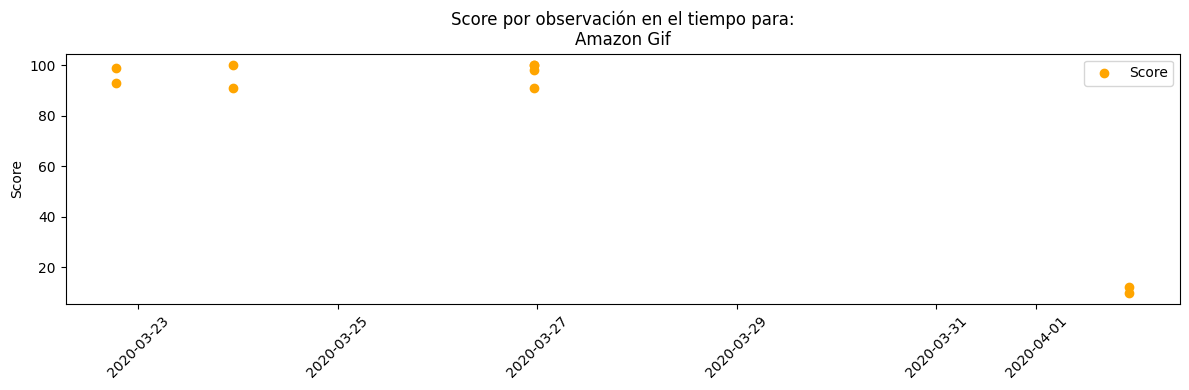

,fecha,fraude,score,Unnamed: 0,a,b,c,d,e,f,...,k,l,m,n,o,p,q,r,s,monto
48598,2020-03-22 18:41:03,1,99.0,48598,2,NaN,NaN,1.0,0.0,0.0,...,0.606759,0.0,0.0,0,N,N,0.00,260445,0,31.80
33256,2020-03-22 18:41:05,1,93.0,33256,2,NaN,NaN,1.0,0.0,0.0,...,0.278670,0.0,0.0,0,NaN,N,0.00,260445,0,31.80
67658,2020-03-23 22:49:21,1,91.0,67658,2,NaN,NaN,1.0,0.0,0.0,...,0.848420,0.0,0.0,0,N,N,0.00,260445,0,31.80
145651,2020-03-23 22:49:23,1,100.0,145651,2,NaN,NaN,1.0,0.0,0.0,...,0.602787,0.0,0.0,0,N,N,0.00,260445,0,31.80
89536,2020-03-26 23:06:06,1,91.0,89536,2,NaN,NaN,1.0,0.0,0.0,...,0.814316,0.0,0.0,0,NaN,N,0.02,260445,0,31.58
97057,2020-03-26 23:06:10,1,98.0,97057,2,NaN,NaN,1.0,0.0,0.0,...,0.731309,0.0,0.0,0,N,N,0.00,260445,0,31.58
90996,2020-03-26 23:06:11,1,100.0,90996,2,NaN,NaN,1.0,0.0,0.0,...,0.731525,0.0,0.0,0,N,N,0.00,260445,0,31.58
135957,2020-03-26 23:06:13,1,100.0,135957,2,NaN,NaN,1.0,0.0,0.0,...,0.317061,0.0,0.0,0,N,N,0.02,260445,0,31.58
82264,2020-04-01 22:22:57,1,10.0,82264,2,1.0,881.68,14.0,0.0,8.0,...,0.680467,488.0,488.0,0,N,N,0.26,881,0,31.36
55071,2020-04-01 22:27:44,1,12.0,55071,2,1.0,913.04,14.0,0.0,9.0,...,0.238970,488.0,488.0,0,N,N,0.28,913,0,125.45


In [103]:
# Filtrar producto por nombre exacto (puedes ajustar con contains si necesario)
nombre_producto = "Amazon Gif"
df_producto = fraud_df[fraud_df['i'] == nombre_producto].copy()

# Asegurarse de ordenar por fecha
df_producto['fecha'] = pd.to_datetime(df_producto['fecha'])
df_producto = df_producto.sort_values('fecha')

# Graficar solo el score: cada punto es una observación
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.scatter(df_producto['fecha'], df_producto['score'], color='orange', label='Score', marker='o')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title(f'Score por observación en el tiempo para:\n{nombre_producto}')
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar score para cada entrada
display(df_producto[['fecha', 'fraude', 'score'] + [col for col in df_producto.columns if col not in ['fecha', 'fraude', 'score']]])
